In [389]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
%matplotlib inline

Get the dataset and read it from a csv file


In [390]:
df=pd.read_csv("C:\\Users\\Rayhaan\\Desktop\\IBM Machine Learning Cert\\supervised learning course\\dataset\\KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get some info about the dataset such as shape, statistics, number of value counts, number of null values and so on...

In [391]:
df.shape

(110527, 14)

In [392]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we see that we have no null values for all the categories but let us check for each column


In [394]:
isnull=df.isnull().sum()
isna=df.isna().sum()
print(' the number of null values are : \n', isnull)
print('\n the number of na values are :\n ', isna)

 the number of null values are : 
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 the number of na values are :
  PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


now let's do some data cleaning
We see that age has 1 value of -1. Let us drop that
Then let us first check for duplicates

In [395]:
age = df[df['Age'] == -1]
print(age)

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


In [396]:
df.drop(index=99832,inplace=True)

In [397]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


check for all the categorical variables and see the distinct values

Let us convert the date and time of the appointment and scheduled day to an appropriate format

In [398]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(8

Now let us take the number of days between scheduled day and appointment day

In [400]:
df['DaysBetweenTowDates']=df['AppointmentDay']-df['ScheduledDay']

In [401]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'].astype('category')).dt.day_name()
df.head(30)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetweenTowDates
0,2.987250e+13,5642903,F,2016-04-29,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
5,9.598513e+13,5626772,F,2016-04-27,Friday,76,REPÚBLICA,0,1,0,0,0,0,No,2 days
6,7.336882e+14,5630279,F,2016-04-27,Friday,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
7,3.449833e+12,5630575,F,2016-04-27,Friday,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
8,5.639473e+13,5638447,F,2016-04-29,Friday,21,ANDORINHAS,0,0,0,0,0,0,No,0 days
9,7.812456e+13,5629123,F,2016-04-27,Friday,19,CONQUISTA,0,0,0,0,0,0,No,2 days


In [402]:
df.drop("ScheduledDay",axis='columns')

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetweenTowDates
0,2.987250e+13,5642903,F,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,Tuesday,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110523,3.596266e+12,5650093,F,Tuesday,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110524,1.557663e+13,5630692,F,Tuesday,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110525,9.213493e+13,5630323,F,Tuesday,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days


In [403]:
df.rename(columns={'No-show': 'NoShow'}, inplace=True)


Lets take a look at the numerical columns now. But first let us drop the appoinment ID and the Patient ID.

In [404]:
df = df.iloc[:, 2:]
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DaysBetweenTowDates
0,F,2016-04-29,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [405]:
df['Scholarship']=df['Scholarship'].replace({0: 'False', 1: 'True'}).astype(object)
df['Hipertension']=df['Hipertension'].replace({0: 'False', 1: 'True'}).astype(object)
df['Diabetes']=df['Diabetes'].replace({0: 'False', 1: 'True'}).astype(object)
df['Alcoholism']=df['Alcoholism'].replace({0: 'False', 1: 'True'}).astype(object)
df['SMS_received']=df['SMS_received'].replace({0: 'False', 1: 'True'}).astype(object)

In [406]:
df['DaysBetweenTowDates']=df['DaysBetweenTowDates'].dt.days
odd1 = df[df['DaysBetweenTowDates'] == -6]
print(odd1)
odd2 = df[df['DaysBetweenTowDates'] == -1]
print(odd2)
df.drop(index=71533,inplace=True)
df.drop(index=27033,inplace=True)
df.drop(index=55226 ,inplace=True)
df.drop(index=64175 ,inplace=True)
df.drop(index=72362 ,inplace=True)

      Gender ScheduledDay AppointmentDay  Age  Neighbourhood Scholarship  \
71533      F   2016-05-11       Thursday   81  SANTO ANTÔNIO       False   

      Hipertension Diabetes Alcoholism  Handcap SMS_received NoShow  \
71533        False    False      False        0        False    Yes   

       DaysBetweenTowDates  
71533                   -6  
      Gender ScheduledDay AppointmentDay  Age  Neighbourhood Scholarship  \
27033      M   2016-05-10         Monday   38    RESISTÊNCIA       False   
55226      F   2016-05-18        Tuesday   19  SANTO ANTÔNIO       False   
64175      F   2016-05-05      Wednesday   22     CONSOLAÇÃO       False   
72362      M   2016-05-04        Tuesday    7     TABUAZEIRO       False   

      Hipertension Diabetes Alcoholism  Handcap SMS_received NoShow  \
27033        False    False      False        1        False    Yes   
55226        False    False      False        1        False    Yes   
64175        False    False      False        0     

In [407]:
numerical_columns=df[['Age','DaysBetweenTowDates','NoShow']]
numerical_columns.head()

,Age,DaysBetweenTowDates,NoShow
0,62,0,No
1,56,0,No
2,62,0,No
3,8,0,No
4,56,0,No


Now let us infer some stats for both the numerical and the categorical data

In [408]:
numerical_columns.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,110521.0,NaN,NaN,NaN,37.089386,23.109885,0.0,18.0,37.0,55.0,115.0
DaysBetweenTowDates,110521.0,NaN,NaN,NaN,10.184345,15.255153,0.0,0.0,4.0,15.0,179.0
NoShow,110521,2,No,88207,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now lets analyze the categorical columns


In [409]:
df['Handcap'] = df['Handcap'].astype('category')
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Gender,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,Friday,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,Friday,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,Friday,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,Friday,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,Friday,JARDIM DA PENHA,False,True,True,False,0,False,No


In [410]:
categorical_columns.describe(include=['object', 'category']).T

,count,unique,top,freq
Gender,110521,2,F,71836
AppointmentDay,110521,6,Wednesday,25866
Neighbourhood,110521,81,JARDIM CAMBURI,7717
Scholarship,110521,2,False,99660
Hipertension,110521,2,False,88720
Diabetes,110521,2,False,102578
Alcoholism,110521,2,False,107161
Handcap,110521,5,0,108282
SMS_received,110521,2,False,75039
NoShow,110521,2,No,88207


From the above, we see that some numerical feature are actually categorical features that have been converted to 0's and 1's and also we see that age has a total of 103 unique values.
Only age is a numerical feature and the rest are categorical.
For the categorical data, we see that scheduled day and appointment day have a total of 860 and 27 unique values respectively. Neighborhood has a total of 81 unique values

Now let's perfom some descriptive statistics visualization on the numerical data and categorical data to derive some insights. Univariate Analysis

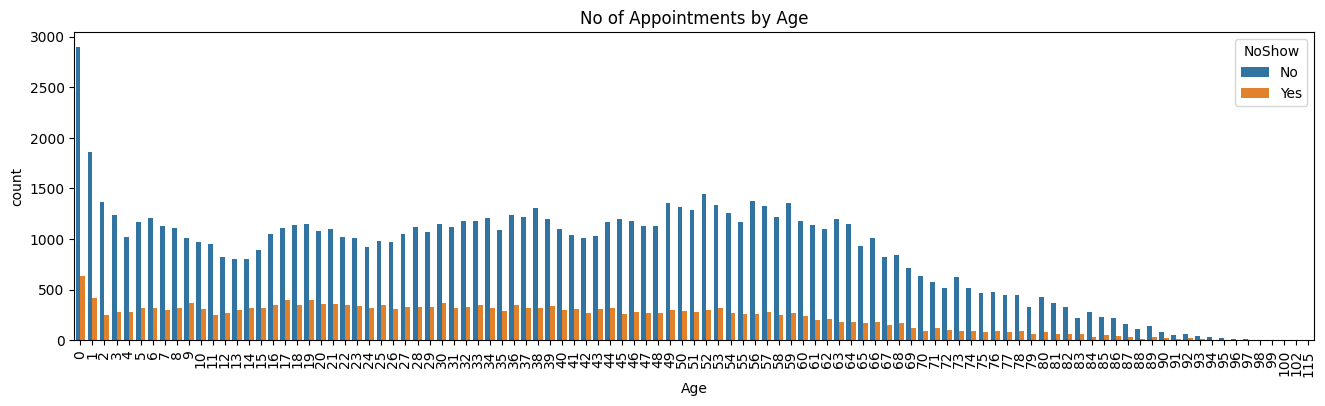

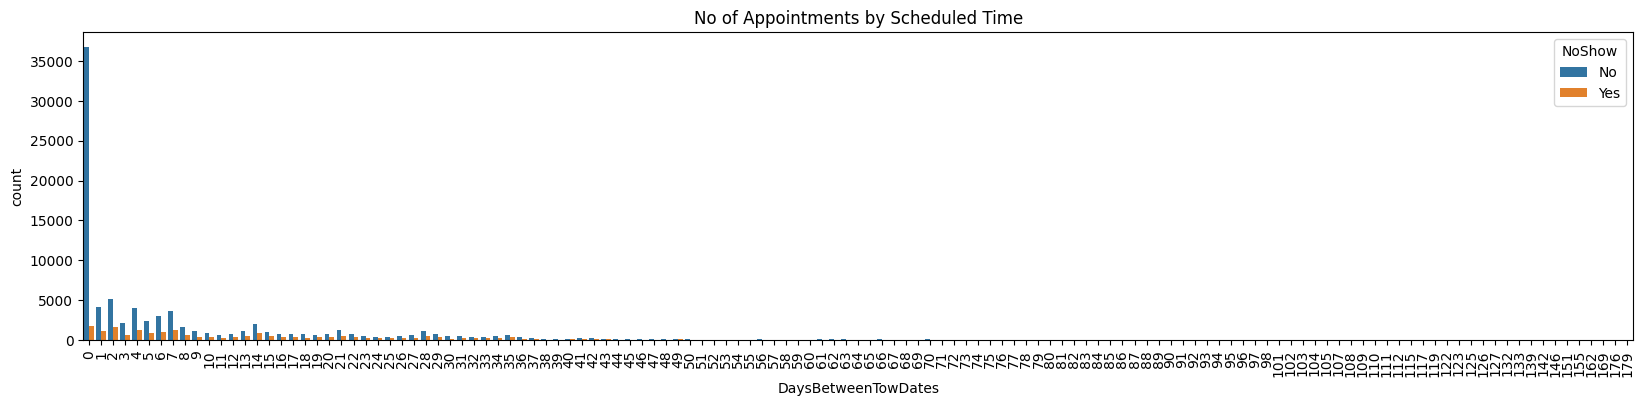

In [411]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=numerical_columns.Age,hue=df.NoShow)
ax.set_title("No of Appointments by Age")
plt.show()


plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=numerical_columns.DaysBetweenTowDates,hue=df.NoShow)
ax.set_title("No of Appointments by Scheduled Time")
plt.show()
# numerical_columns['ScheduledDay_numeric'].hist(figsize=(14,12),bins=10)
# plt.xlabel('Scheduled Time (in hours)')
# plt.ylabel('Frequency')
# plt.title('Distribution of ScheduledDay in Hours')

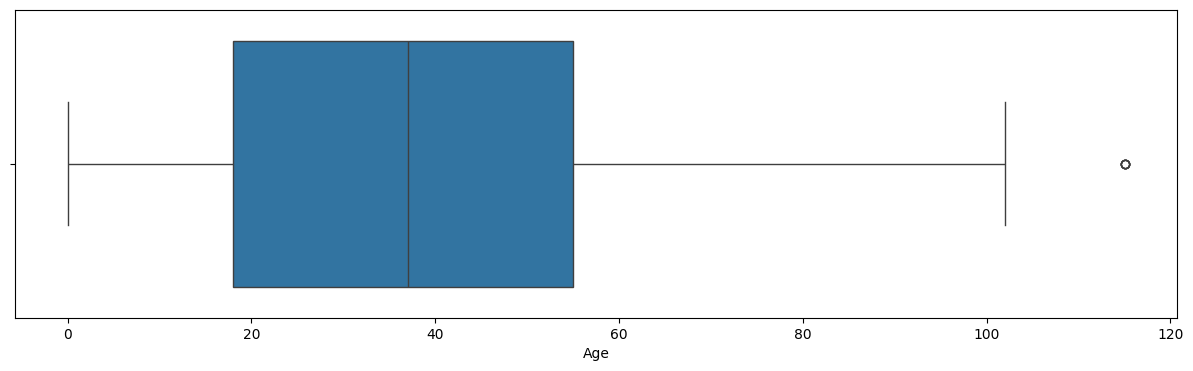

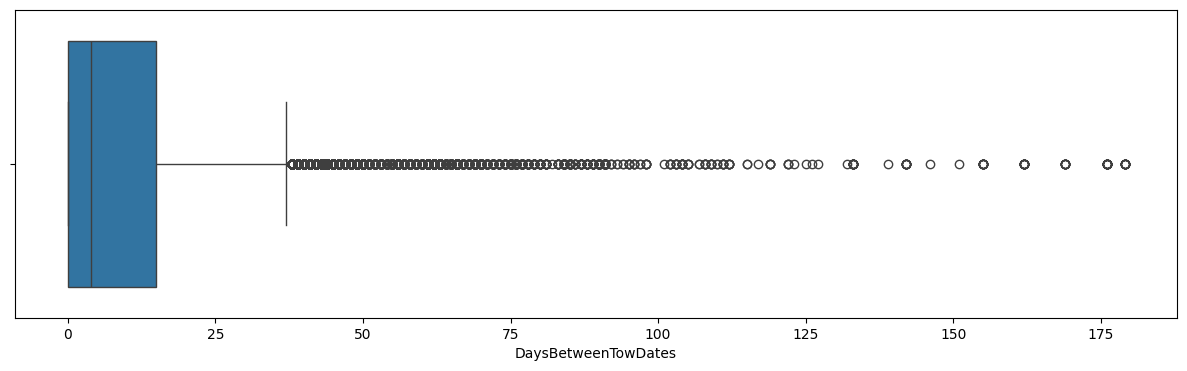

In [412]:
plt.figure(figsize = (15, 4))
sns.boxplot(x=numerical_columns['Age'])
plt.show()

plt.figure(figsize = (15, 4))
sns.boxplot(x=numerical_columns['DaysBetweenTowDates'])
plt.show() 

From the above we see that age is slighly rightly skewed and we have an outlier of 115.

<h1> Univariate analysis of categorical variables </h1>

Gender



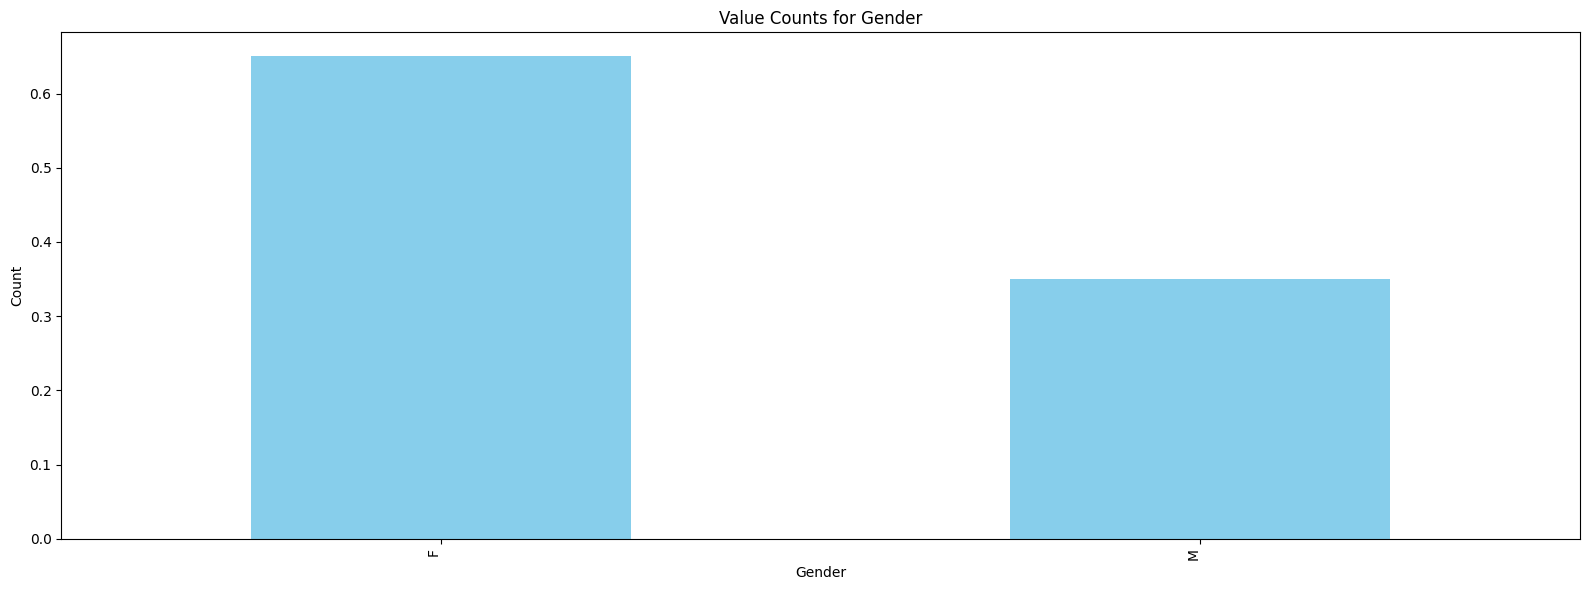

AppointmentDay



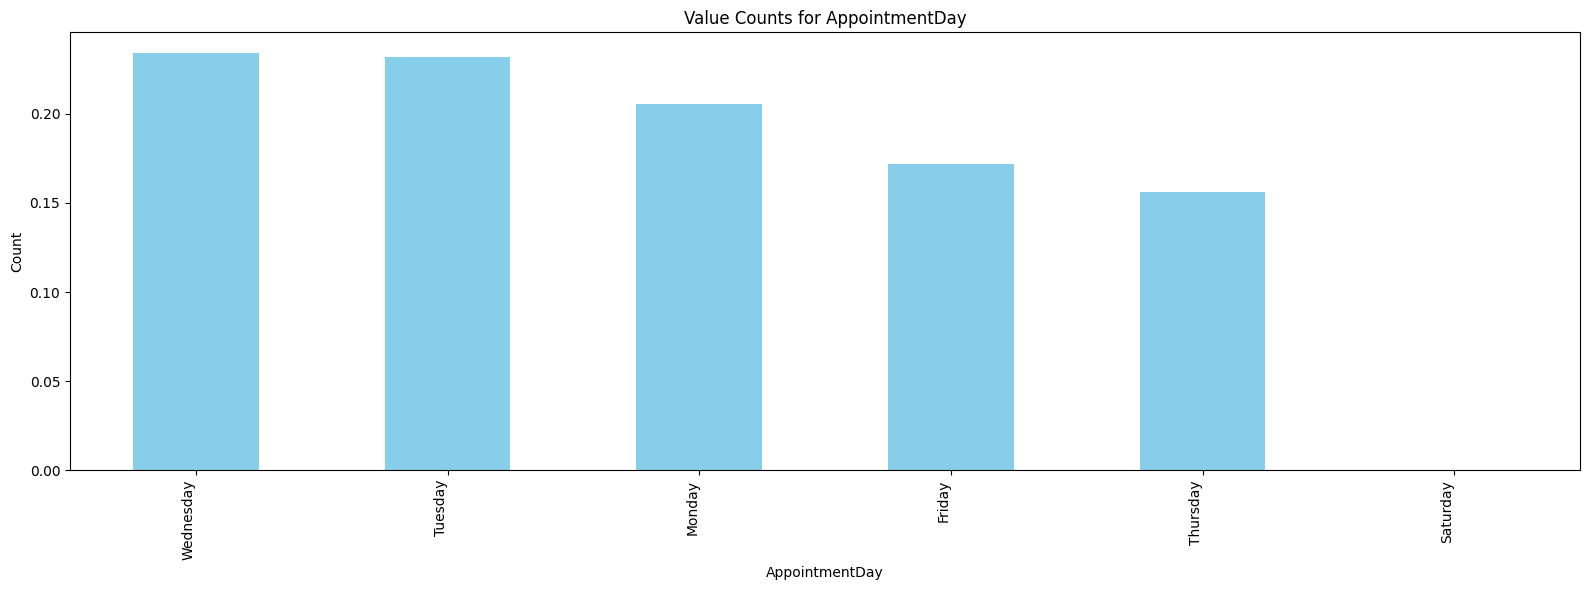

Neighbourhood



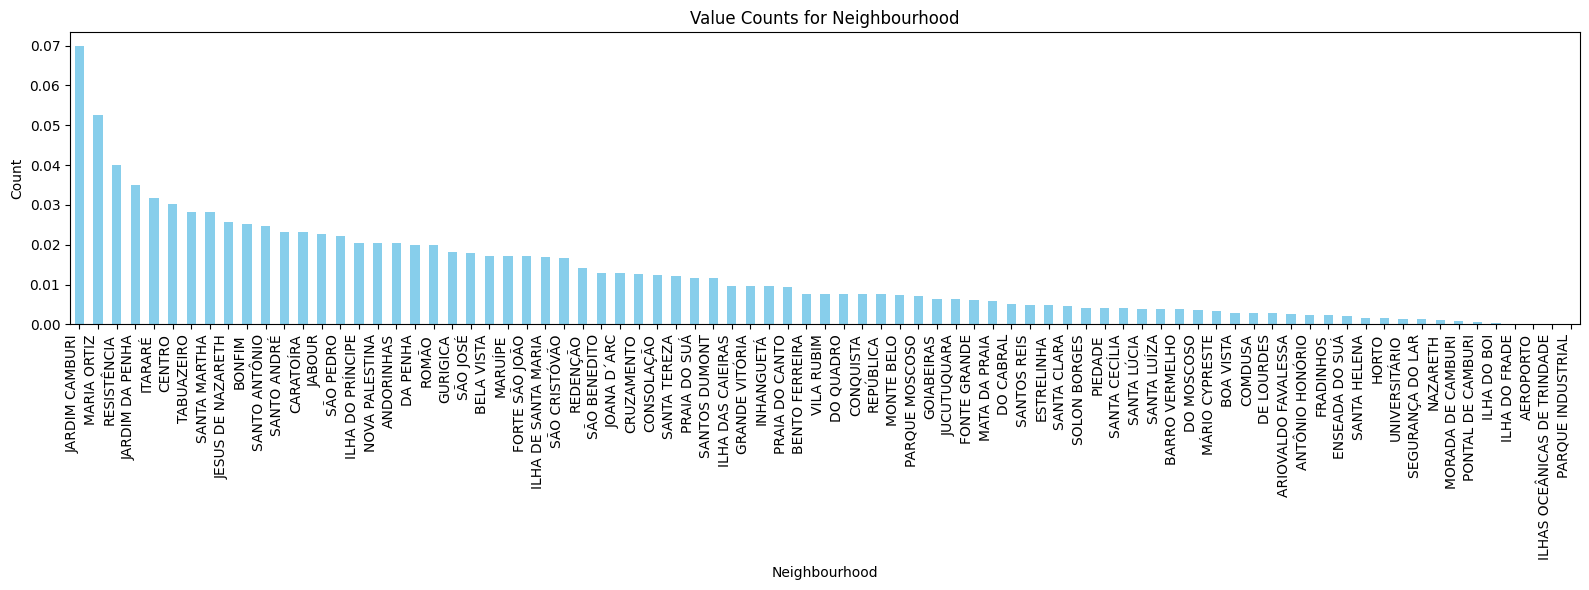

Scholarship



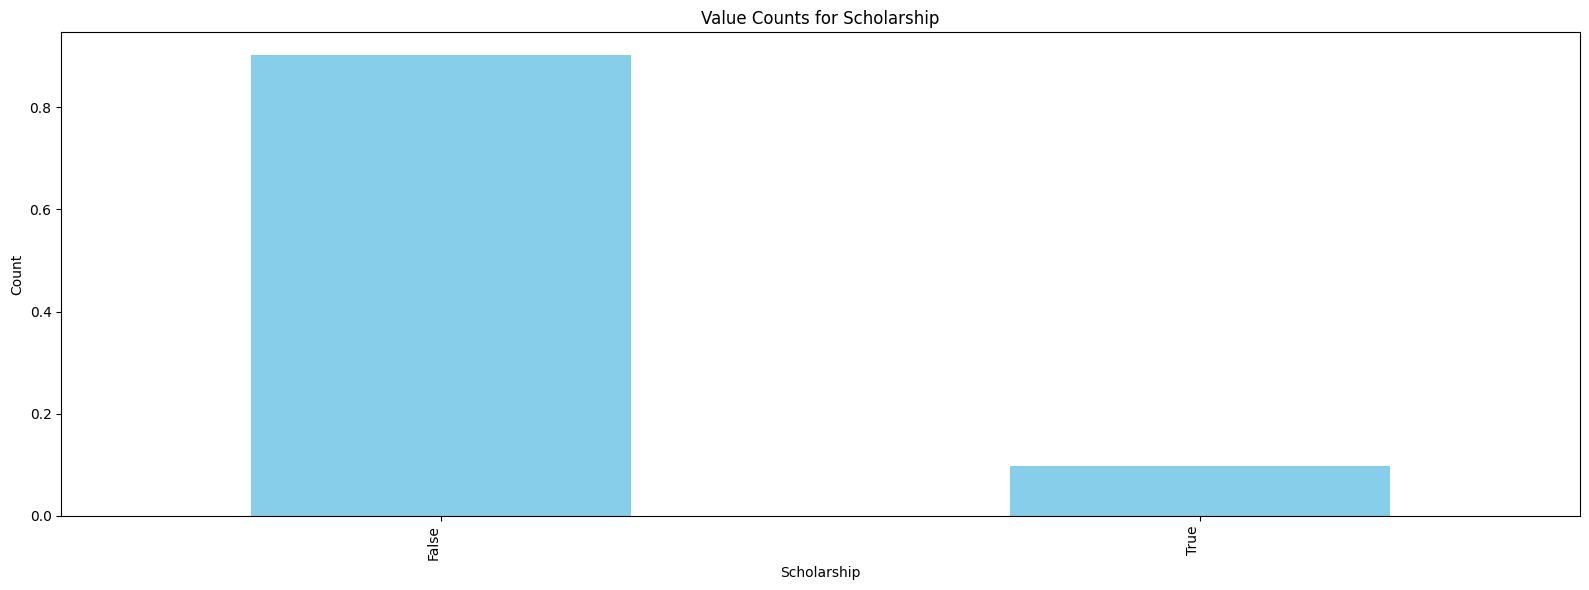

Hipertension



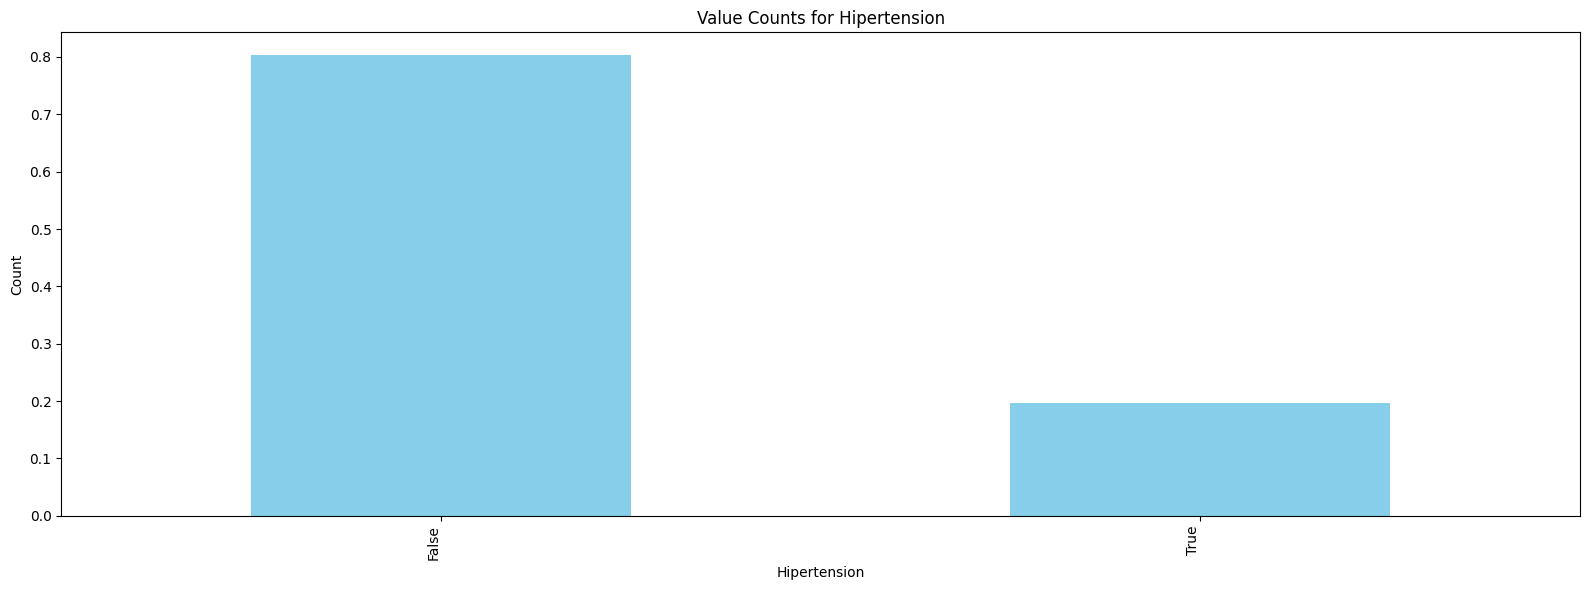

Diabetes



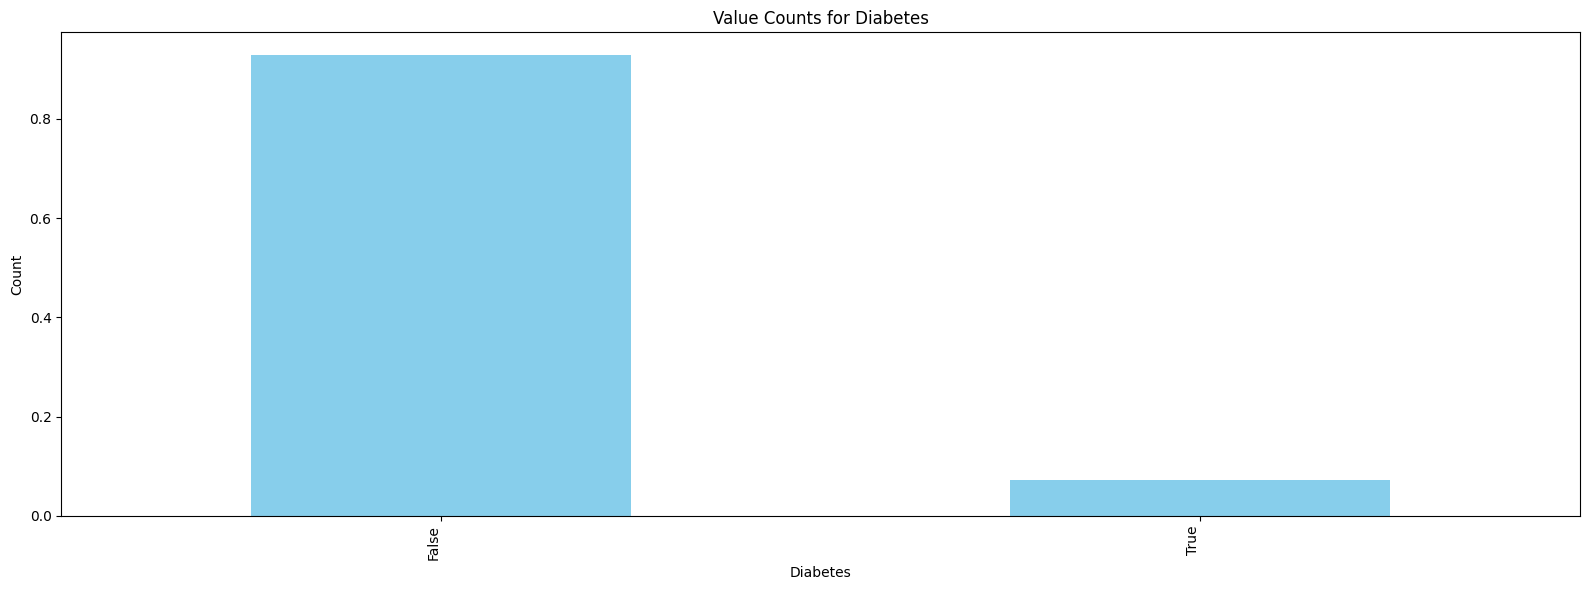

Alcoholism



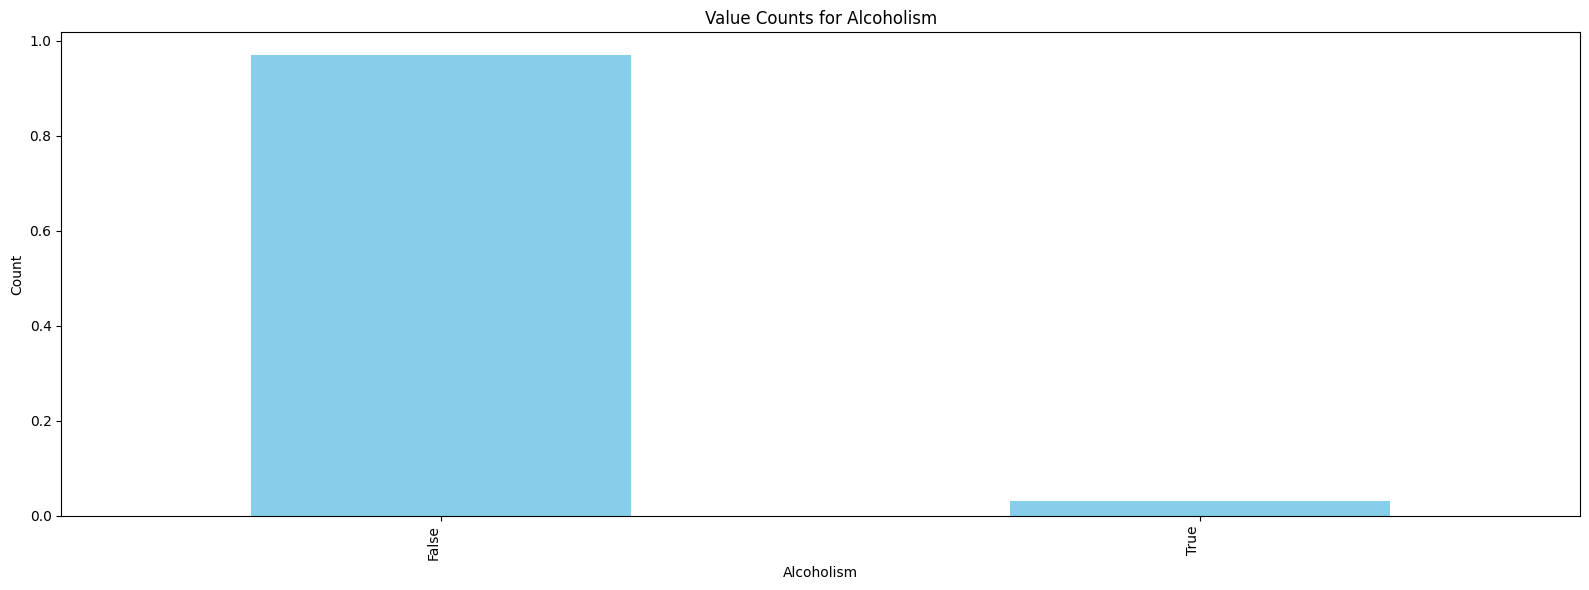

Handcap



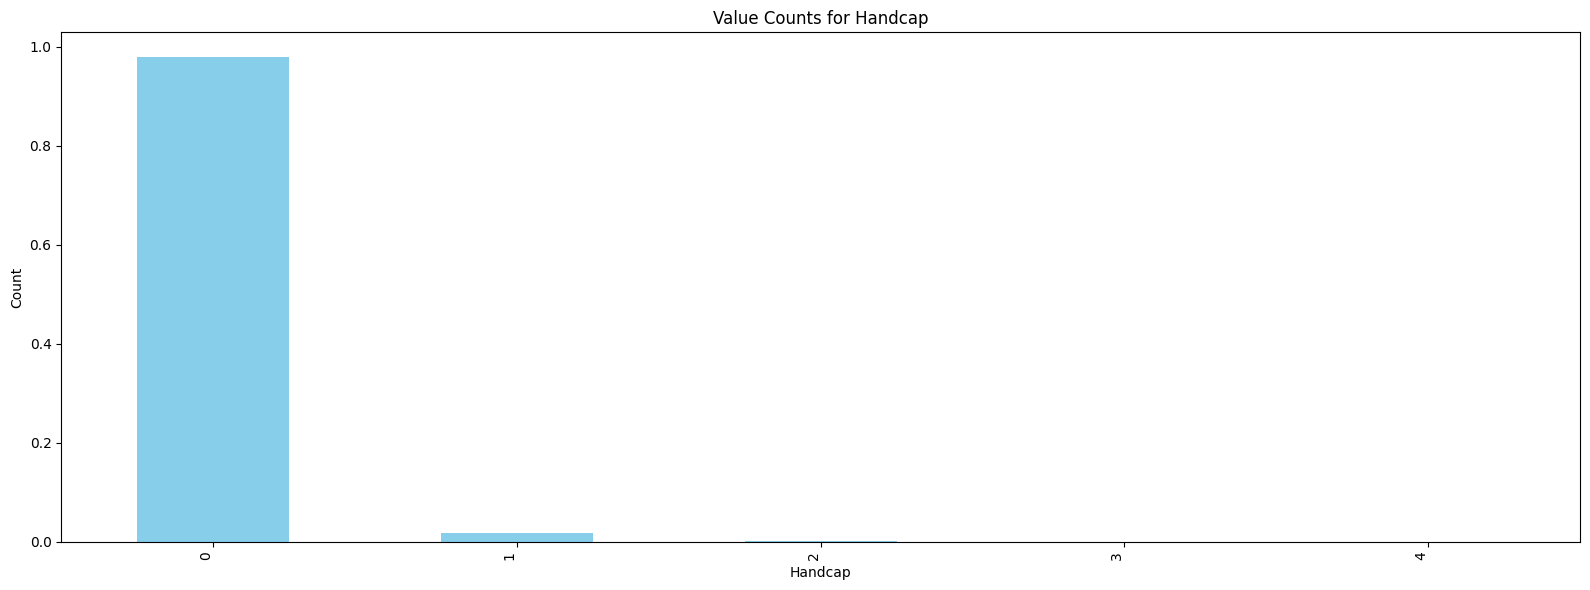

SMS_received



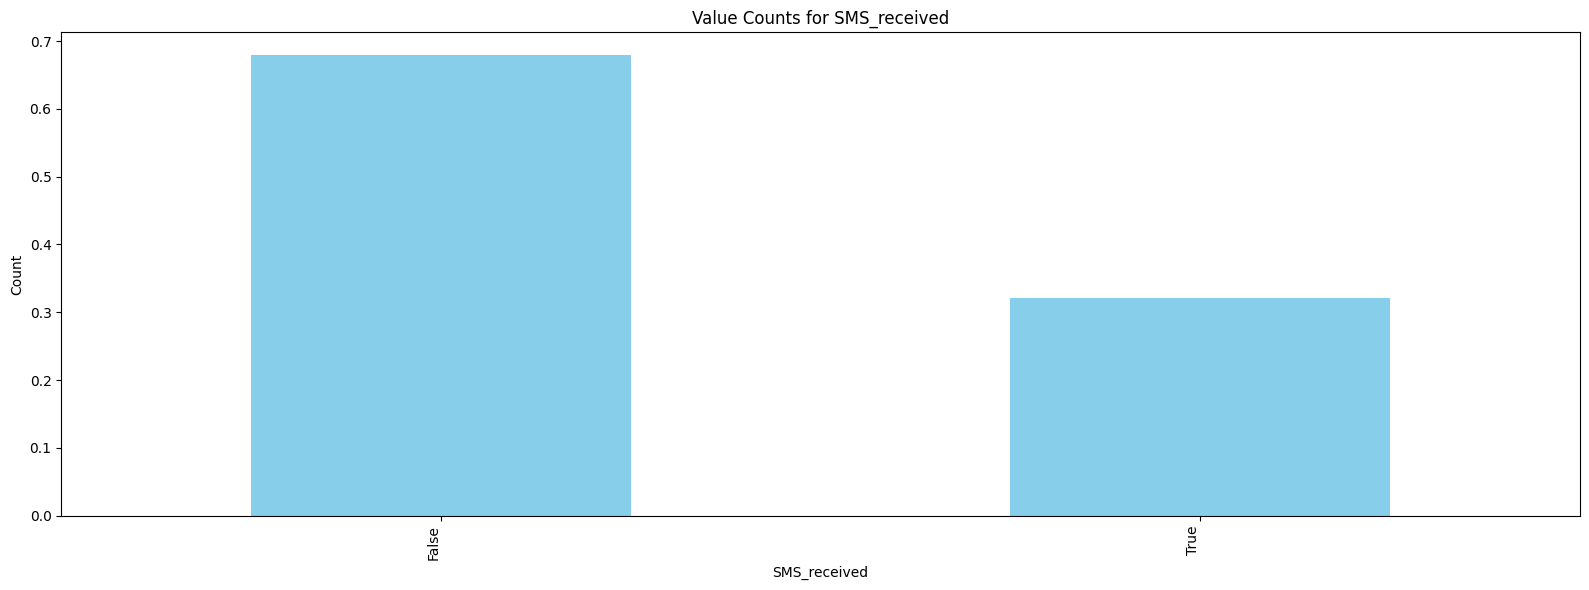

NoShow



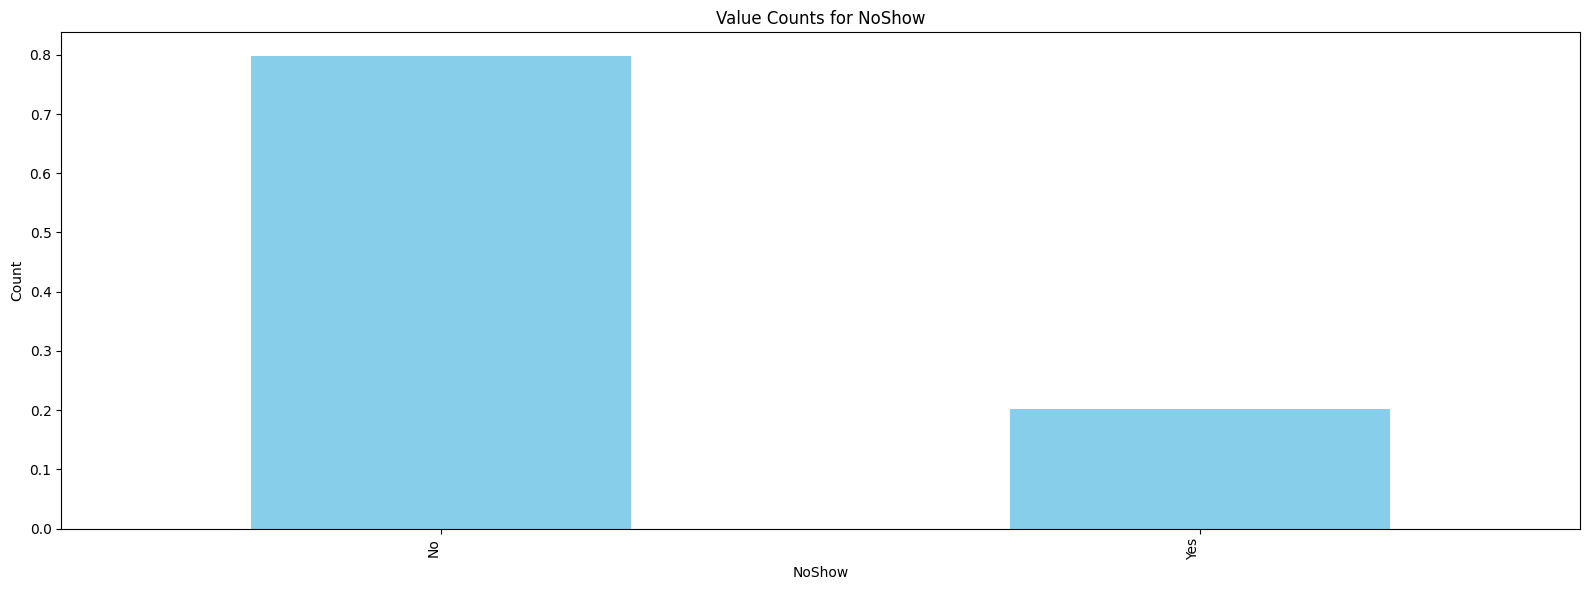

In [413]:
for col in categorical_columns:
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    plt.figure(figsize=(16, 6))  # Set figure size
    categorical_columns[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')  # Plot bar chart
    plt.title(f'Value Counts for {col}')  # Add title
    plt.xlabel(col)  # Label x-axis
    plt.ylabel('Count')  # Label y-axis
    plt.xticks(rotation=90, ha='right')  # Rotate x-ticks if necessary
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()  # Show the plot

<h1>Bivariate analysis of categorical variables</h1>


Gender



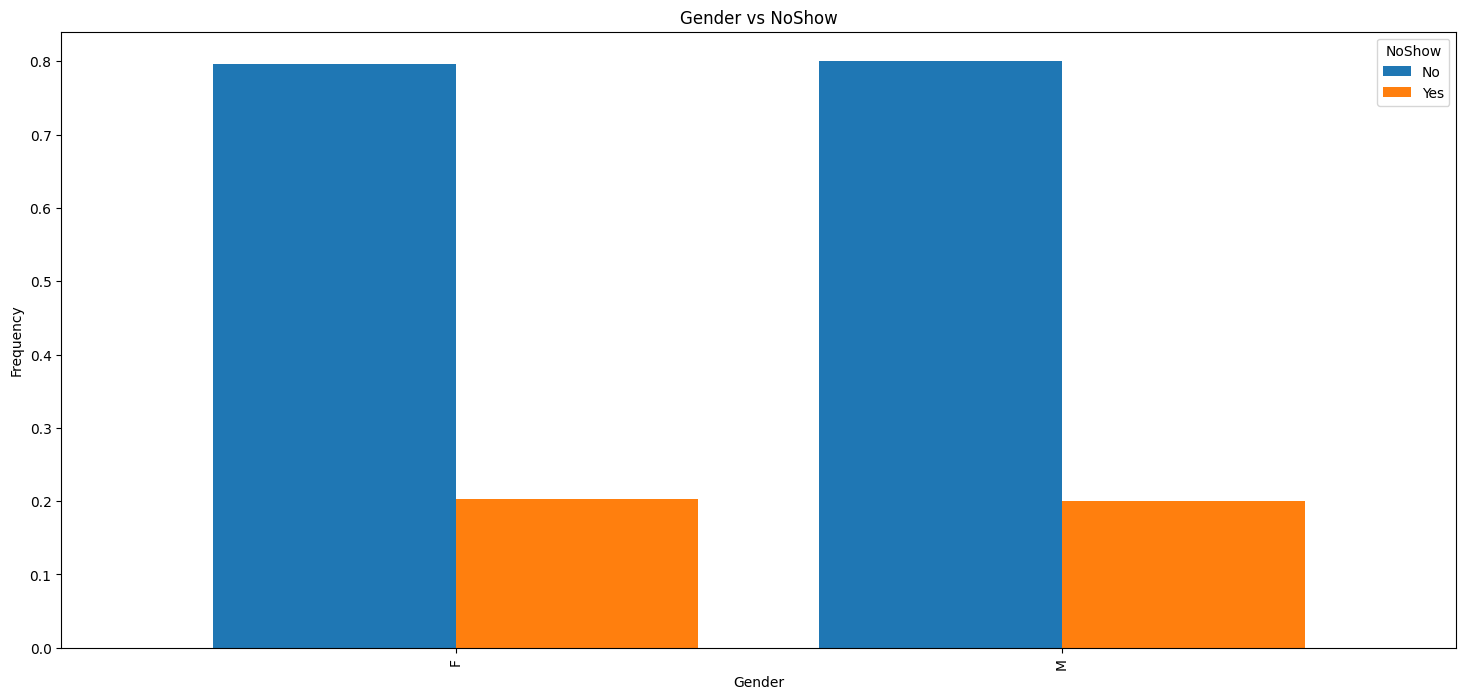

AppointmentDay



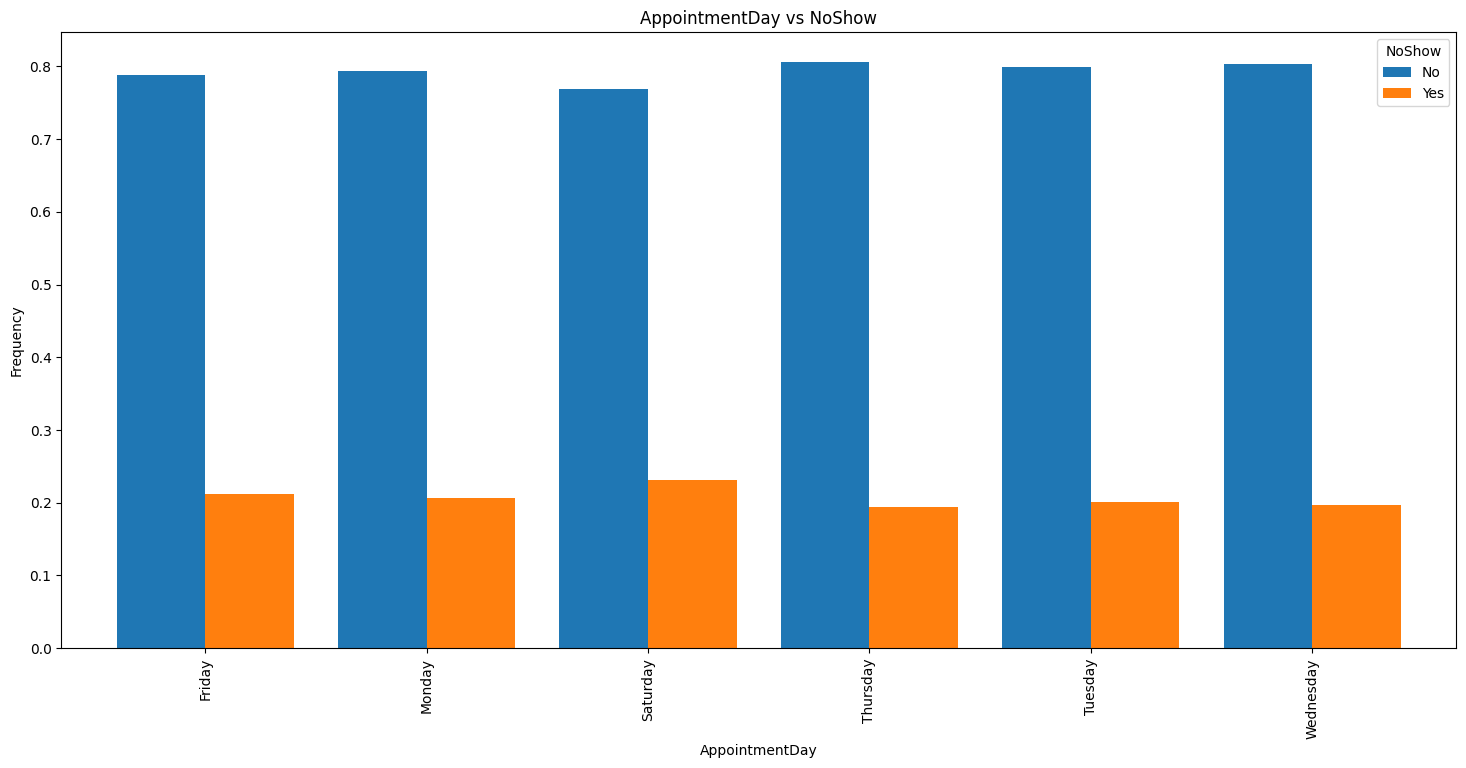

Neighbourhood



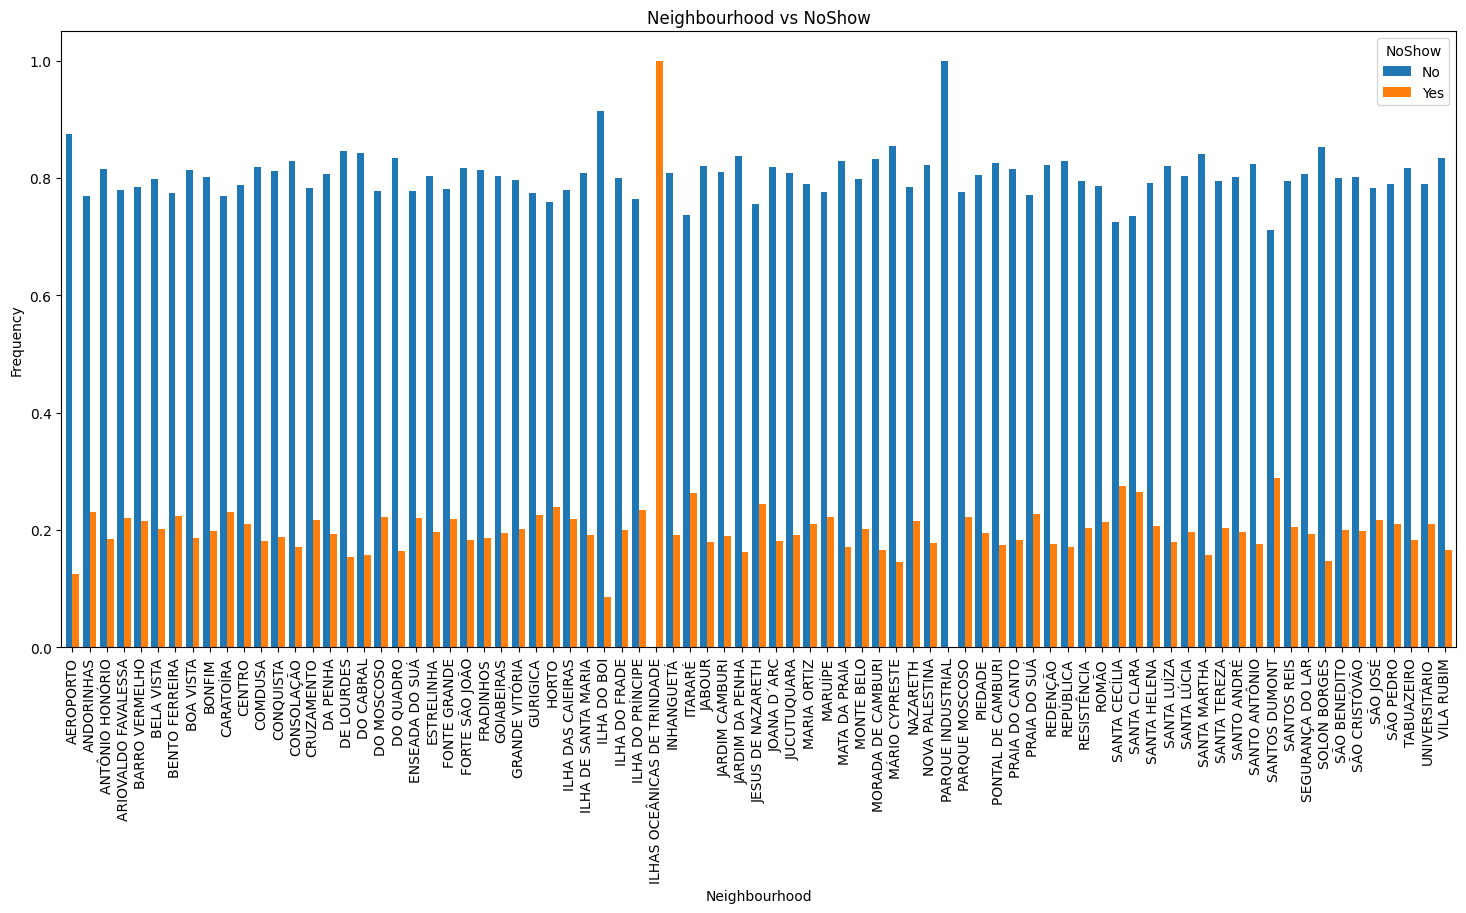

Scholarship



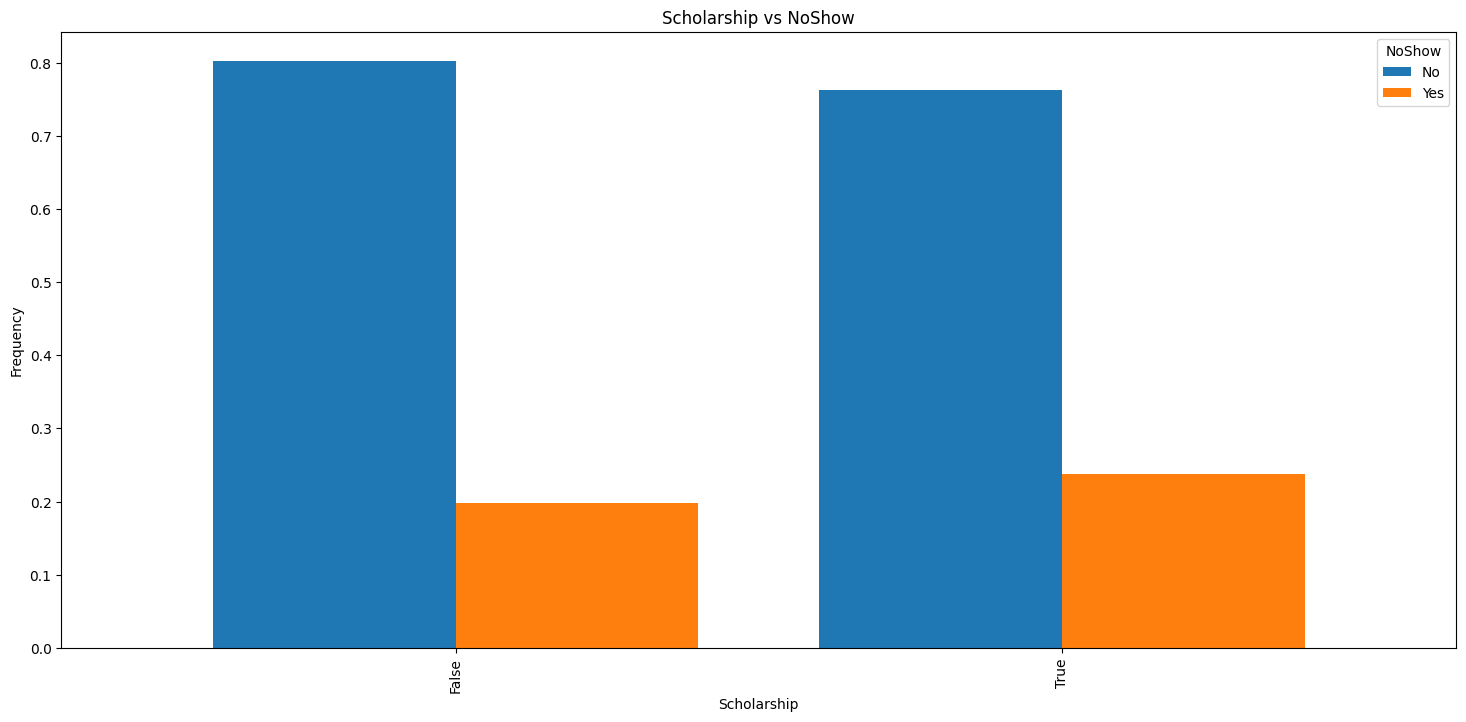

Hipertension



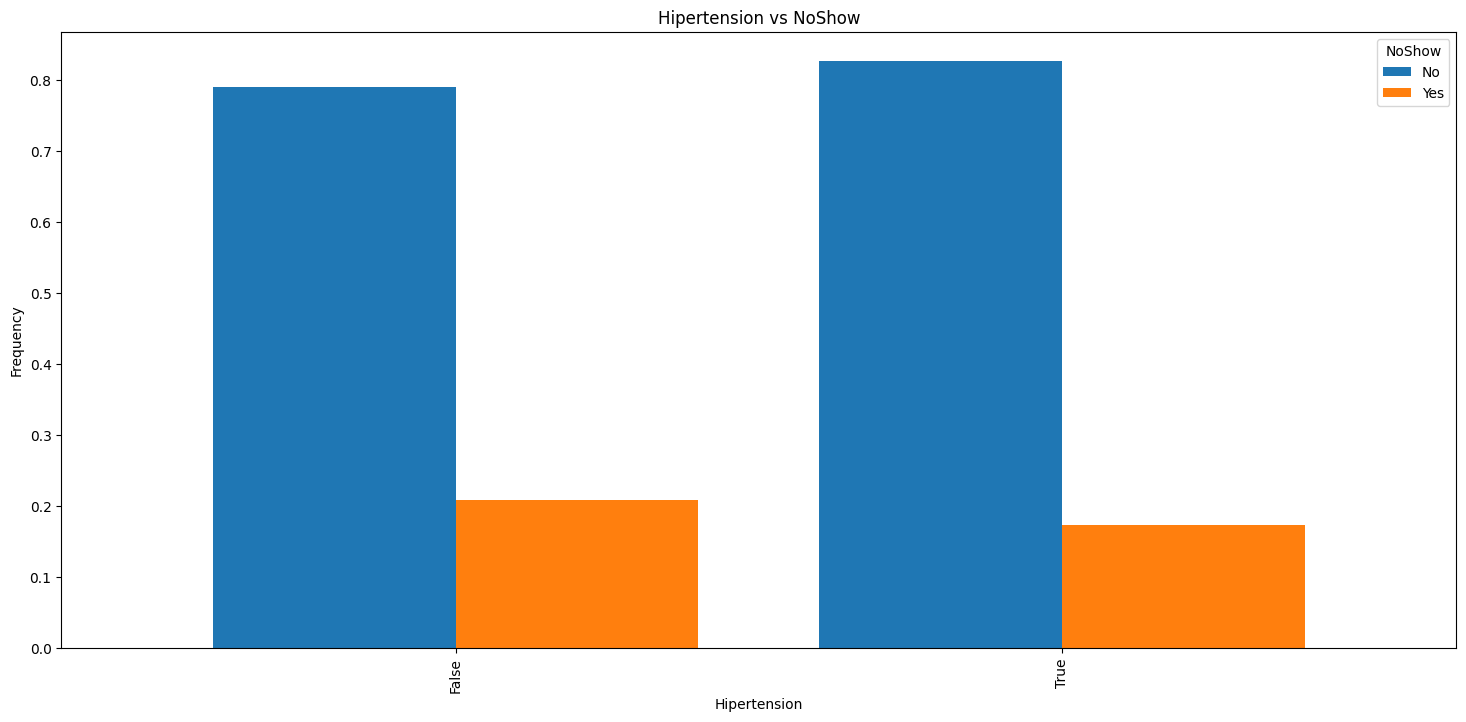

Diabetes



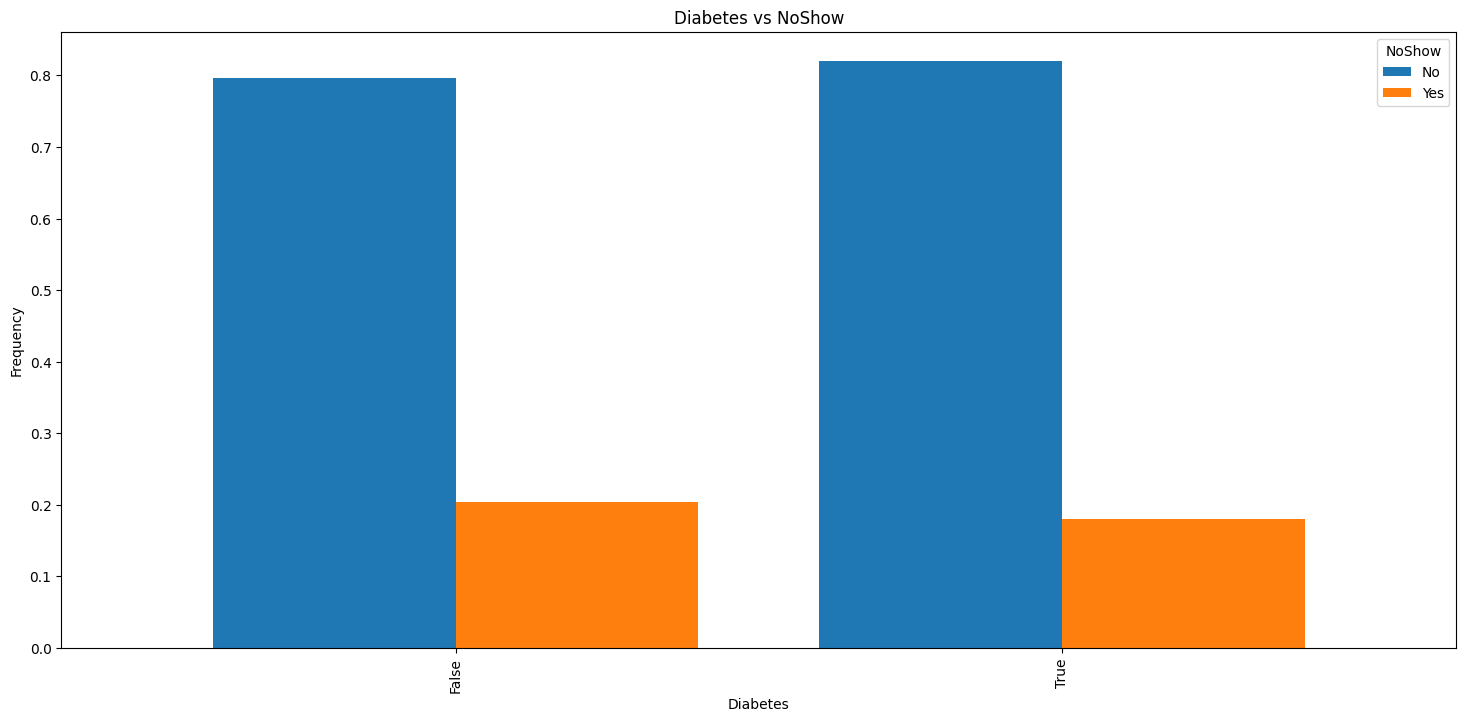

Alcoholism



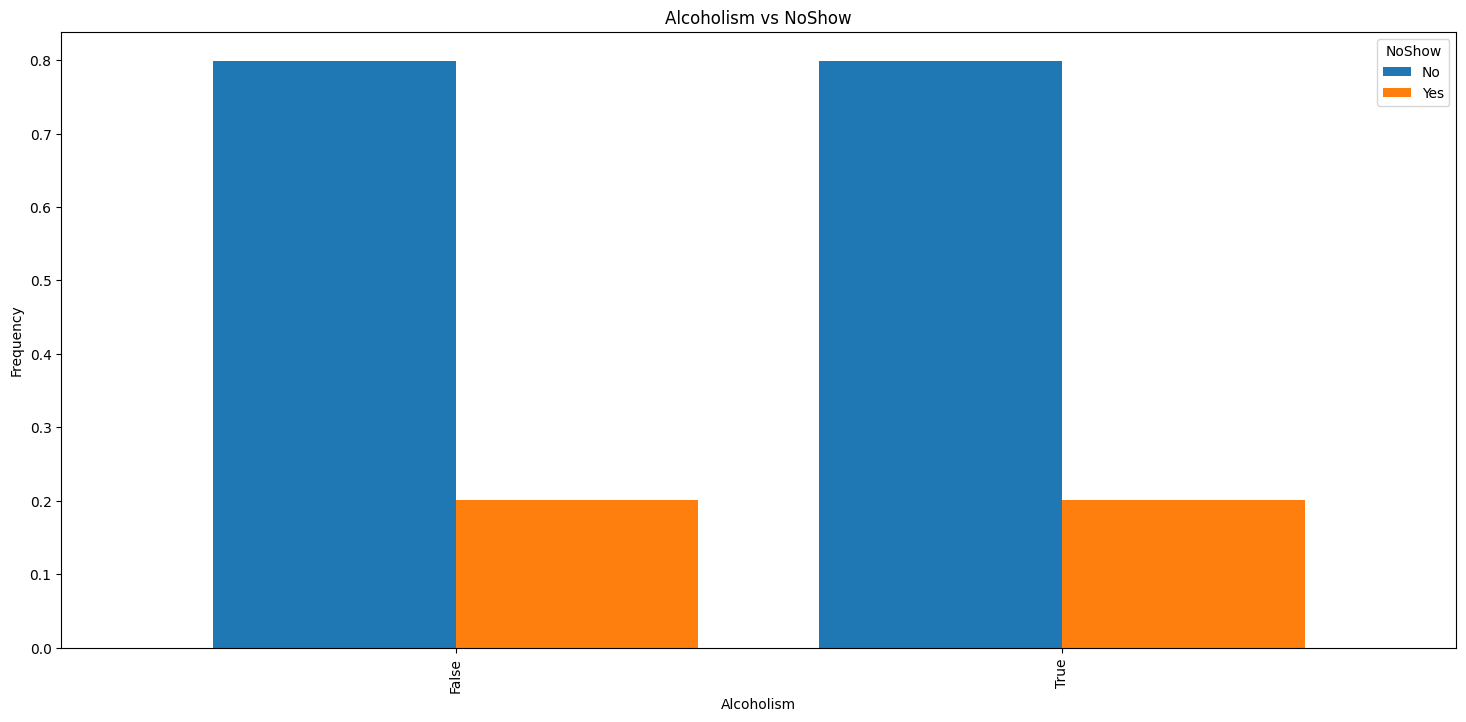

Handcap



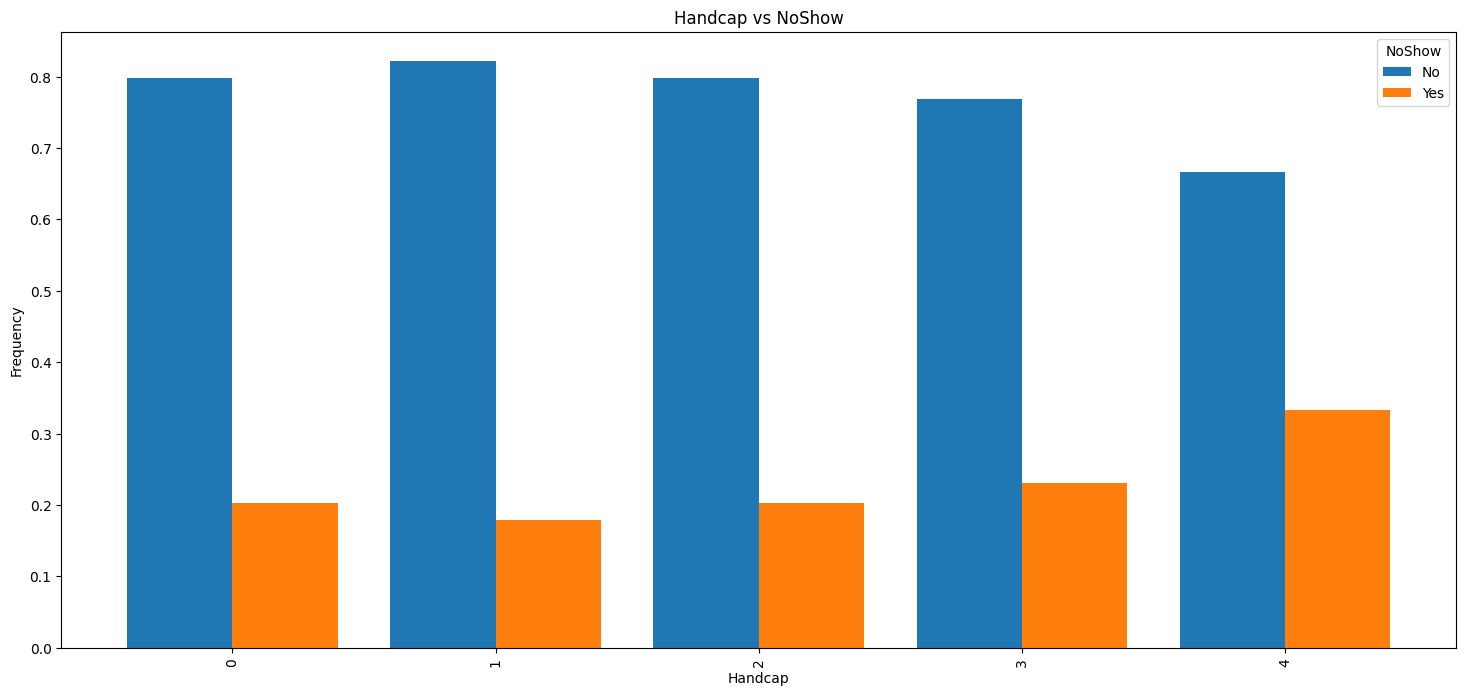

SMS_received



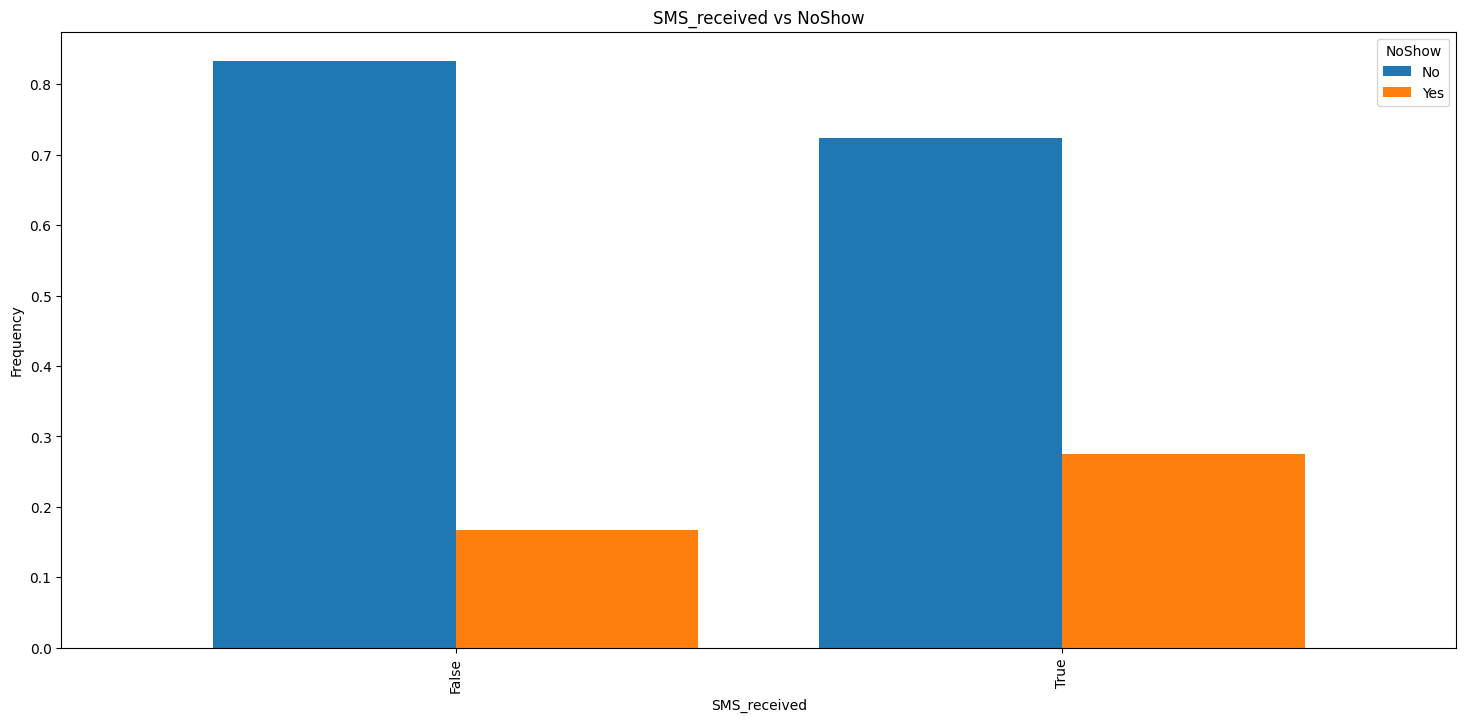

NoShow



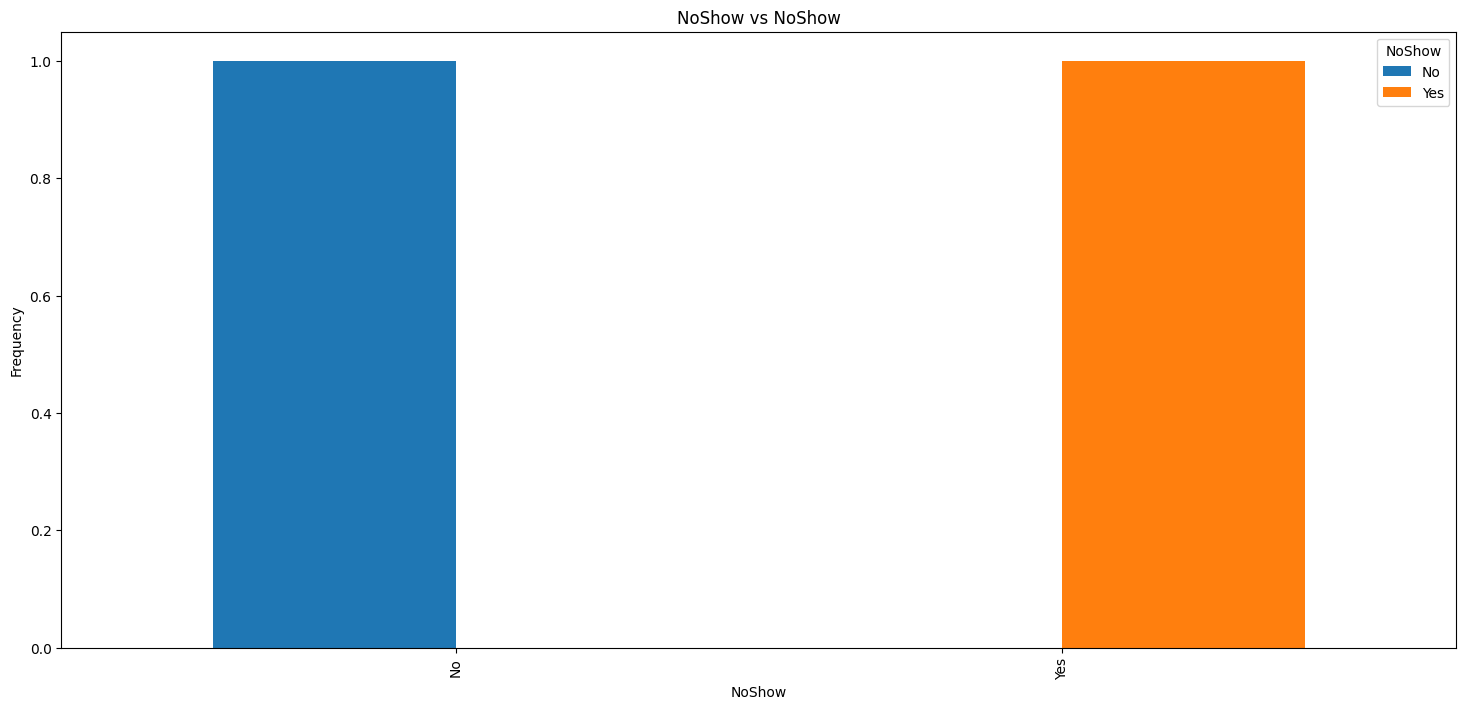

In [414]:


for col in categorical_columns:
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    grouped = df.groupby([col, 'NoShow']).size().unstack(fill_value=0)
    grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0) 
    # Plotting the grouped data
    grouped_normalized.plot(kind='bar', stacked=False,rot=90, xlabel=col, ylabel='Frequency', figsize=(18, 8), width=0.8)
    
    # Add a title
    plt.title(f'{col} vs NoShow')
    
    plt.show()

<h1>Multivariate Analysis </h1>


Testing the hypothesis of Old female people have a higher rate of no show

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\3384790105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_1['AgeGroup'] = pd.cut(hypothesis_1['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])


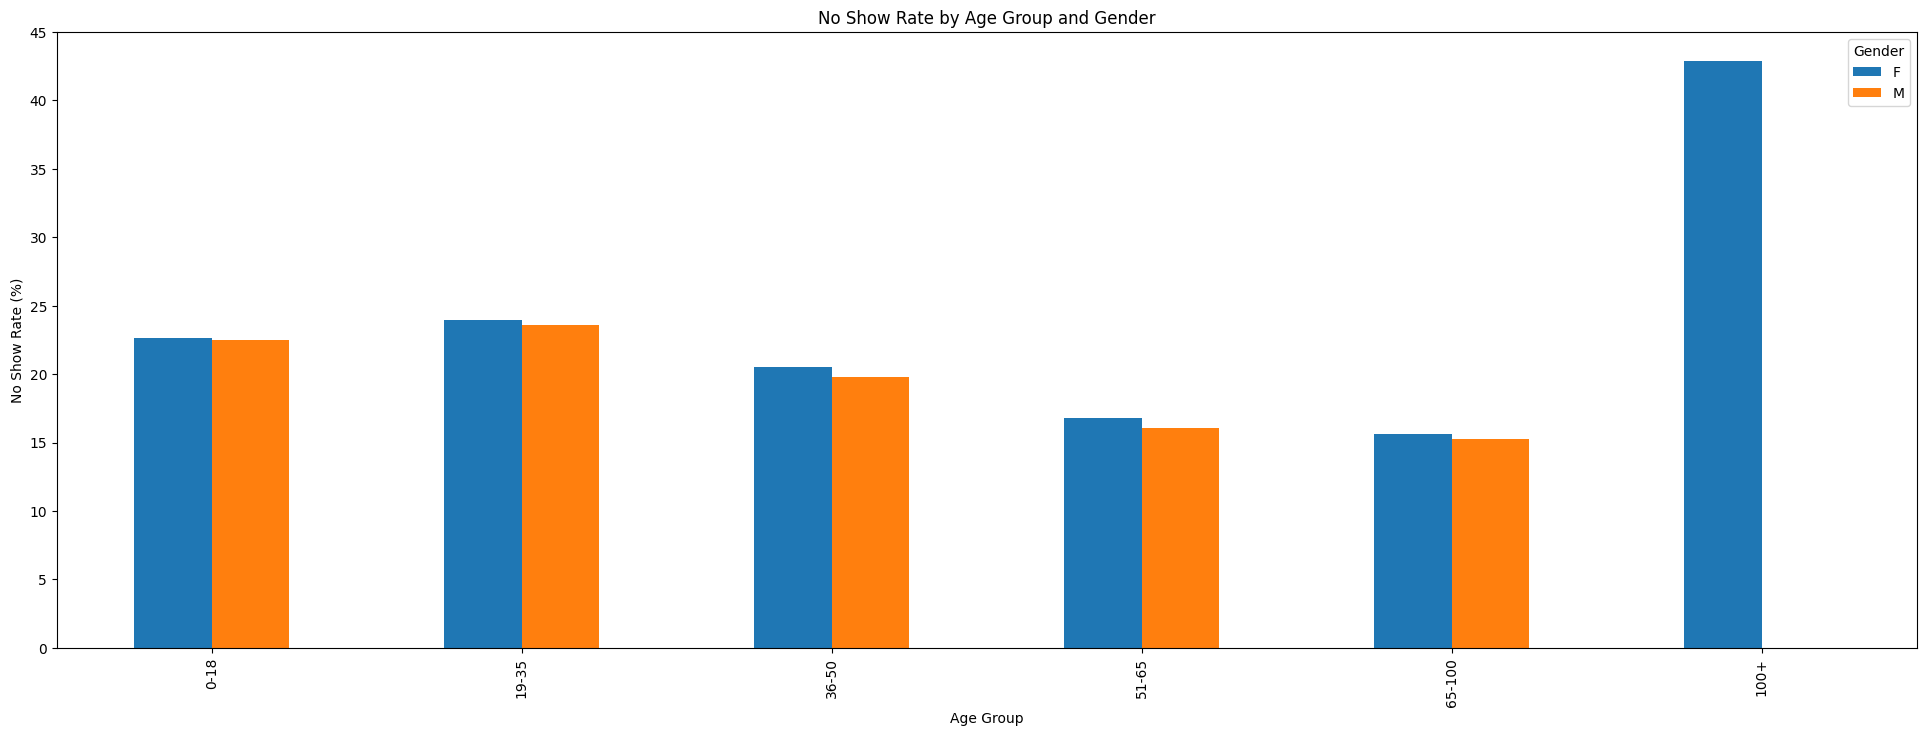

NoShow              No   Yes  Total  NoShowRate
AgeGroup Gender                                
0-18     F       10242  2991  13233   22.602584
         M        9377  2716  12093   22.459274
19-35    F       13402  4216  17618   23.930072
         M        4982  1535   6517   23.553782
36-50    F       12123  3136  15259   20.551805

In [415]:
hypothesis_1=df[['Age','Gender','NoShow']]
hypothesis_1['AgeGroup'] = pd.cut(hypothesis_1['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
grouped = hypothesis_1.groupby(['AgeGroup', 'Gender', 'NoShow']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped['NoShowRate'] = grouped['Yes'] / grouped['Total'] * 100  # assuming 'Yes' is for no-shows
grouped['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Age Group and Gender')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
grouped.head()

Hypothesis 2: Woman suffering from alcoholism have a greater rate of no show

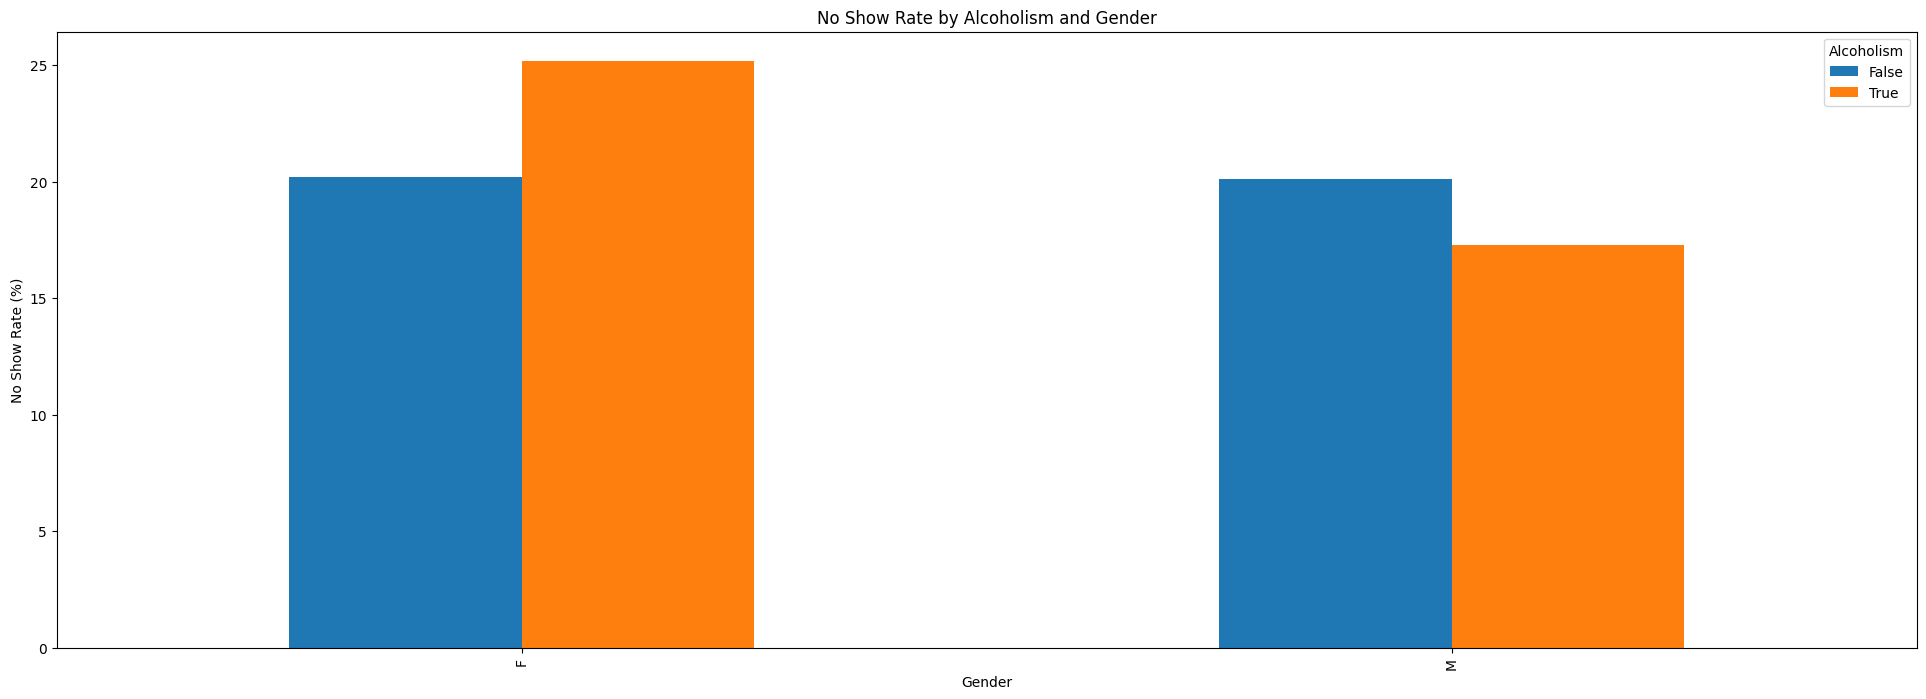

NoShow                No    Yes  Total  NoShowRate
Gender Alcoholism                                 
F      False       56330  14283  70613   20.227154
       True          915    308   1223   25.183974
M      False       29194   7354  36548   20.121484
       True         1768    369   2137   17.267197

In [416]:
hypothesis_2=df[['Gender','Alcoholism','NoShow']]
grouped_2 = hypothesis_2.groupby([ 'Gender','Alcoholism', 'NoShow']).size().unstack(fill_value=0)
grouped_2['Total'] = grouped_2.sum(axis=1)
grouped_2['NoShowRate'] = grouped_2['Yes'] / grouped_2['Total'] * 100  # assuming 'Yes' is for no-shows
grouped_2['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Alcoholism and Gender')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show()
grouped_2.head()

Hypothesis 3: Old people suffering from alcoholism have a greater rate of no show

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\3640502253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_3['AgeGroup'] = pd.cut(hypothesis_3['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])


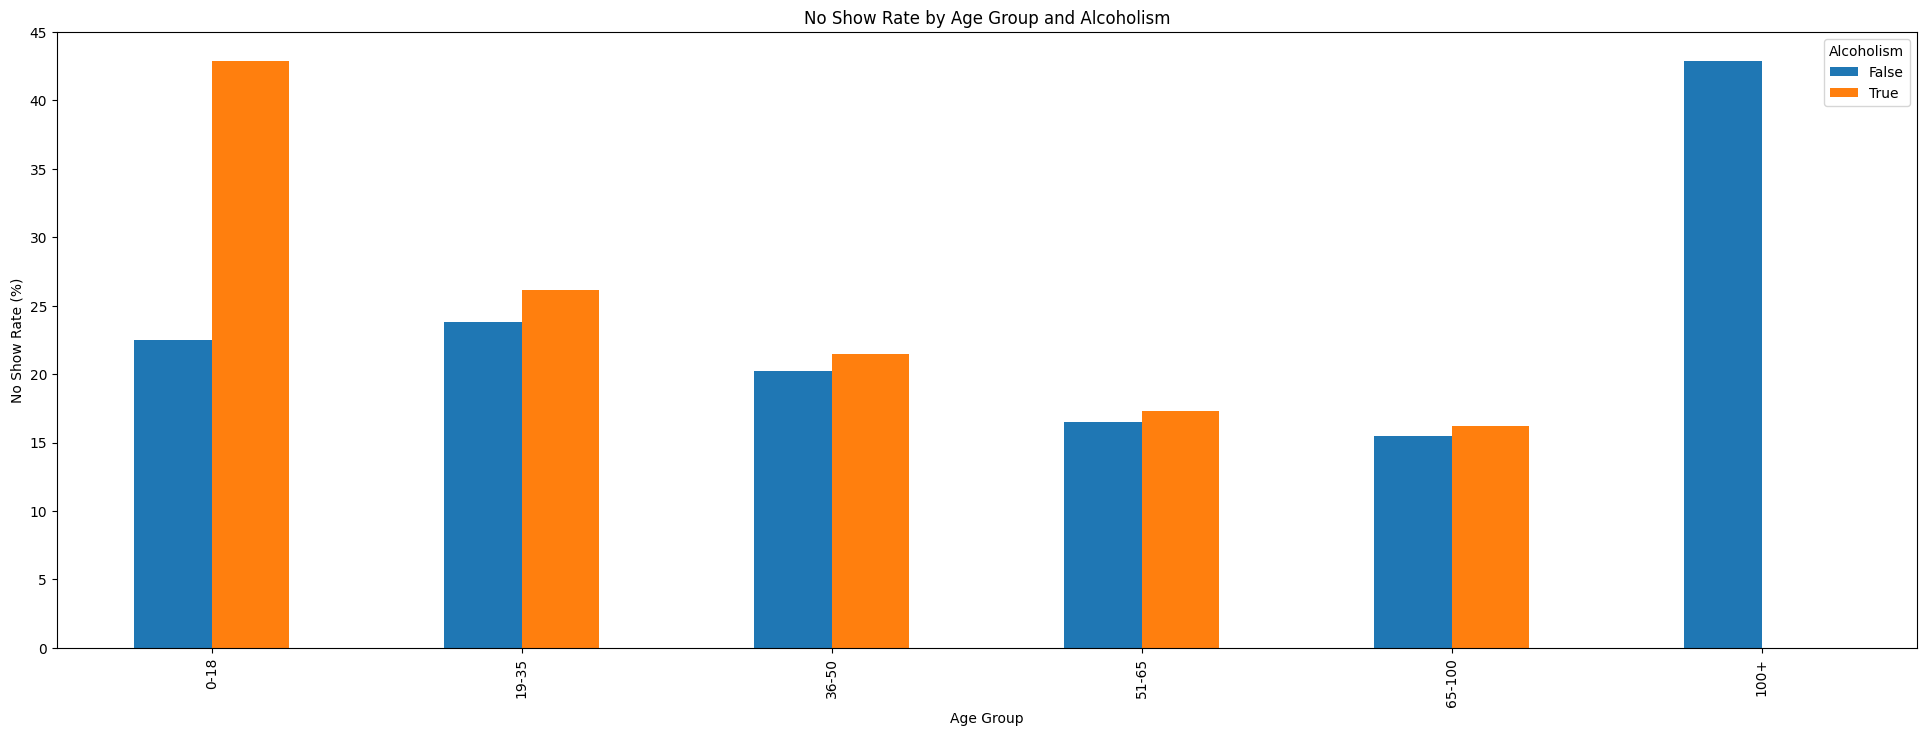

NoShow                  No   Yes  Total  NoShowRate
AgeGroup Alcoholism                                
0-18     False       19603  5695  25298   22.511661
         True           16    12     28   42.857143
19-35    False       18056  5635  23691   23.785404
         True          328   116    444   26.126126
36-50    False       16611  4219  20830   20.254441

In [417]:
hypothesis_3=df[['Age','Alcoholism','NoShow']]
hypothesis_3['AgeGroup'] = pd.cut(hypothesis_3['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
grouped_3 = hypothesis_3.groupby(['AgeGroup', 'Alcoholism', 'NoShow']).size().unstack(fill_value=0)
grouped_3['Total'] = grouped_3.sum(axis=1)
grouped_3['NoShowRate'] = grouped_3['Yes'] / grouped_3['Total'] * 100  # assuming 'Yes' is for no-shows
grouped_3['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Age Group and Alcoholism')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
grouped_3.head()

Hypothesis 4: Old people from a certain neighborhood are less likely to have no show

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\3530960512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_4['AgeGroup'] = pd.cut(hypothesis_4['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])


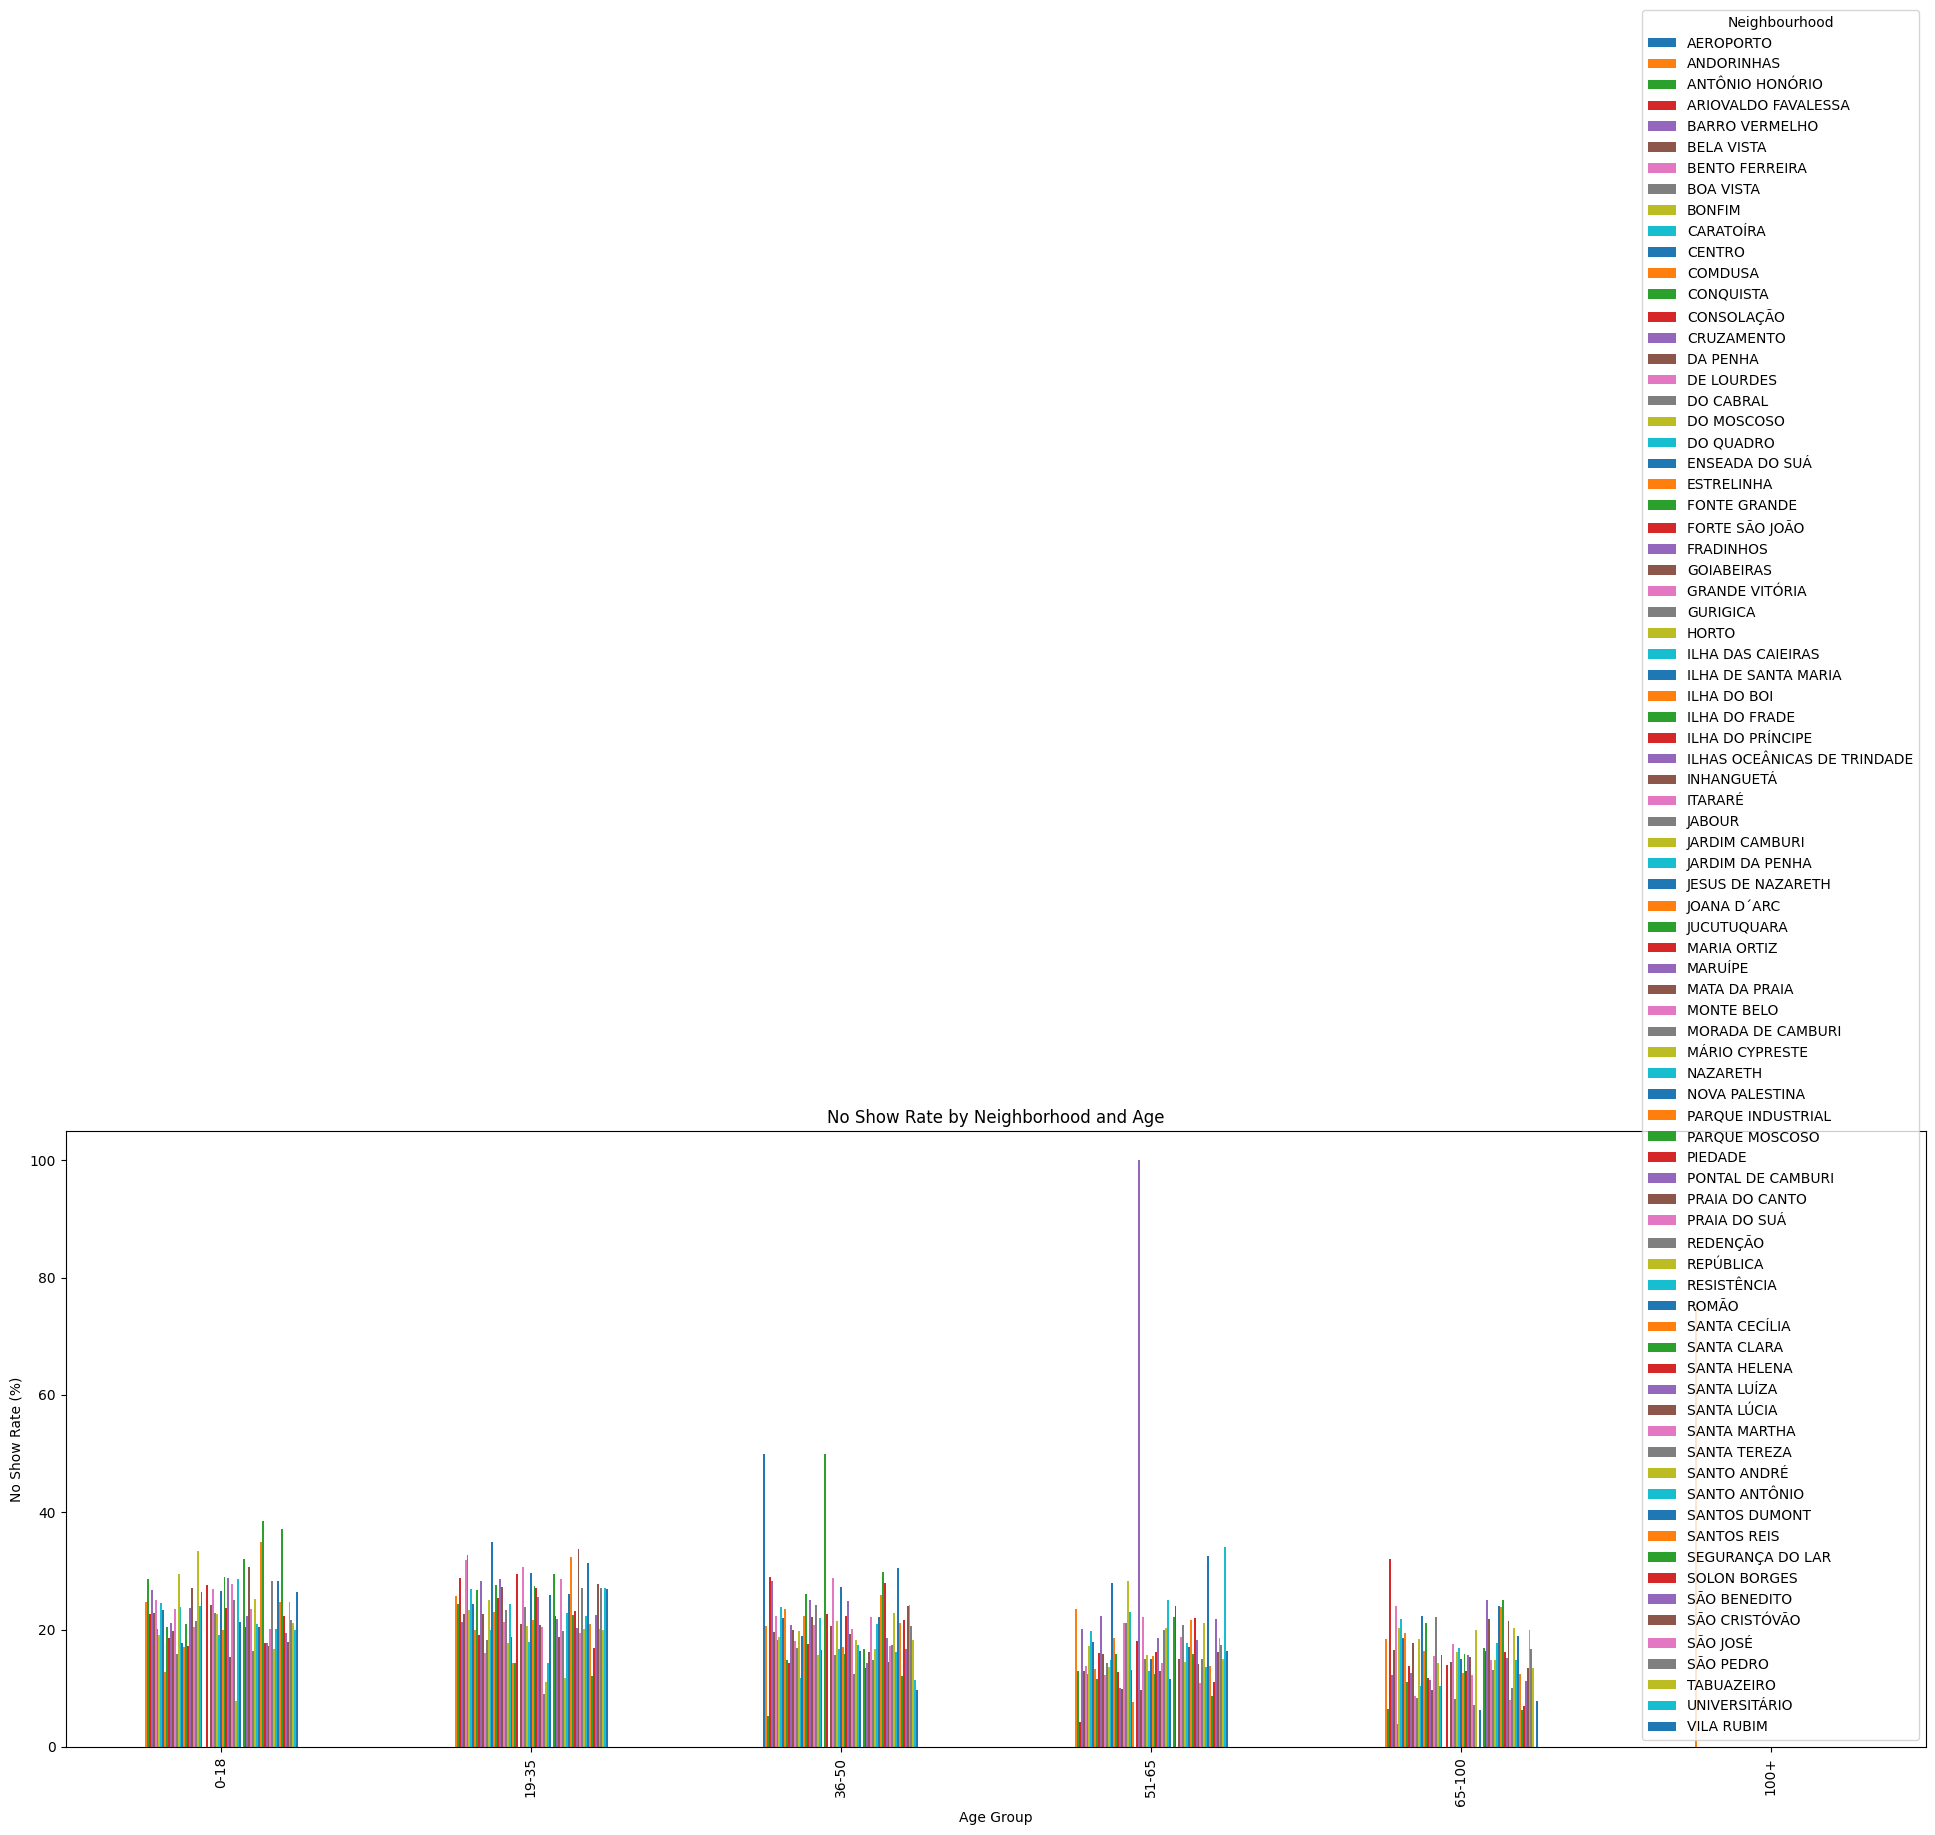

NoShow                         No  Yes  Total  NoShowRate
AgeGroup Neighbourhood                                   
0-18     AEROPORTO              0    0      0         NaN
         ANDORINHAS           397  130    527   24.667932
         ANTÔNIO HONÓRIO       40   16     56   28.571429
         ARIOVALDO FAVALESSA   65   19     84   22.619048
         BARRO VERMELHO        33   12     45   26.666667
...                           ...  ...    ...         ...
         SANTA LÚCIA           48   10     58   17.241379
         SANTA MARTHA         577  145    722   20.083102
         SANTA TEREZA         230   91    321   28.348910
         SANTO ANDRÉ          618  123    741   16.599190
         SANTO ANTÔNIO        513  129    642   20.093458

[70 rows x 4 columns]

In [418]:
hypothesis_4=df[['Age','Neighbourhood','NoShow']]
hypothesis_4['AgeGroup'] = pd.cut(hypothesis_4['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
grouped_4=hypothesis_4.groupby(['AgeGroup','Neighbourhood','NoShow']).size().unstack(fill_value=0)
grouped_4['Total']=grouped_4.sum(axis=1)
grouped_4['NoShowRate']=grouped_4['Yes']/grouped_4['Total'] *100
grouped_4['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Neighborhood and Age')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
grouped_4.head(70)

Hypothesis 5: Different age groups having diseases have different rates of no show

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\3472262271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_5['AgeGroup'] = pd.cut(hypothesis_5['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])


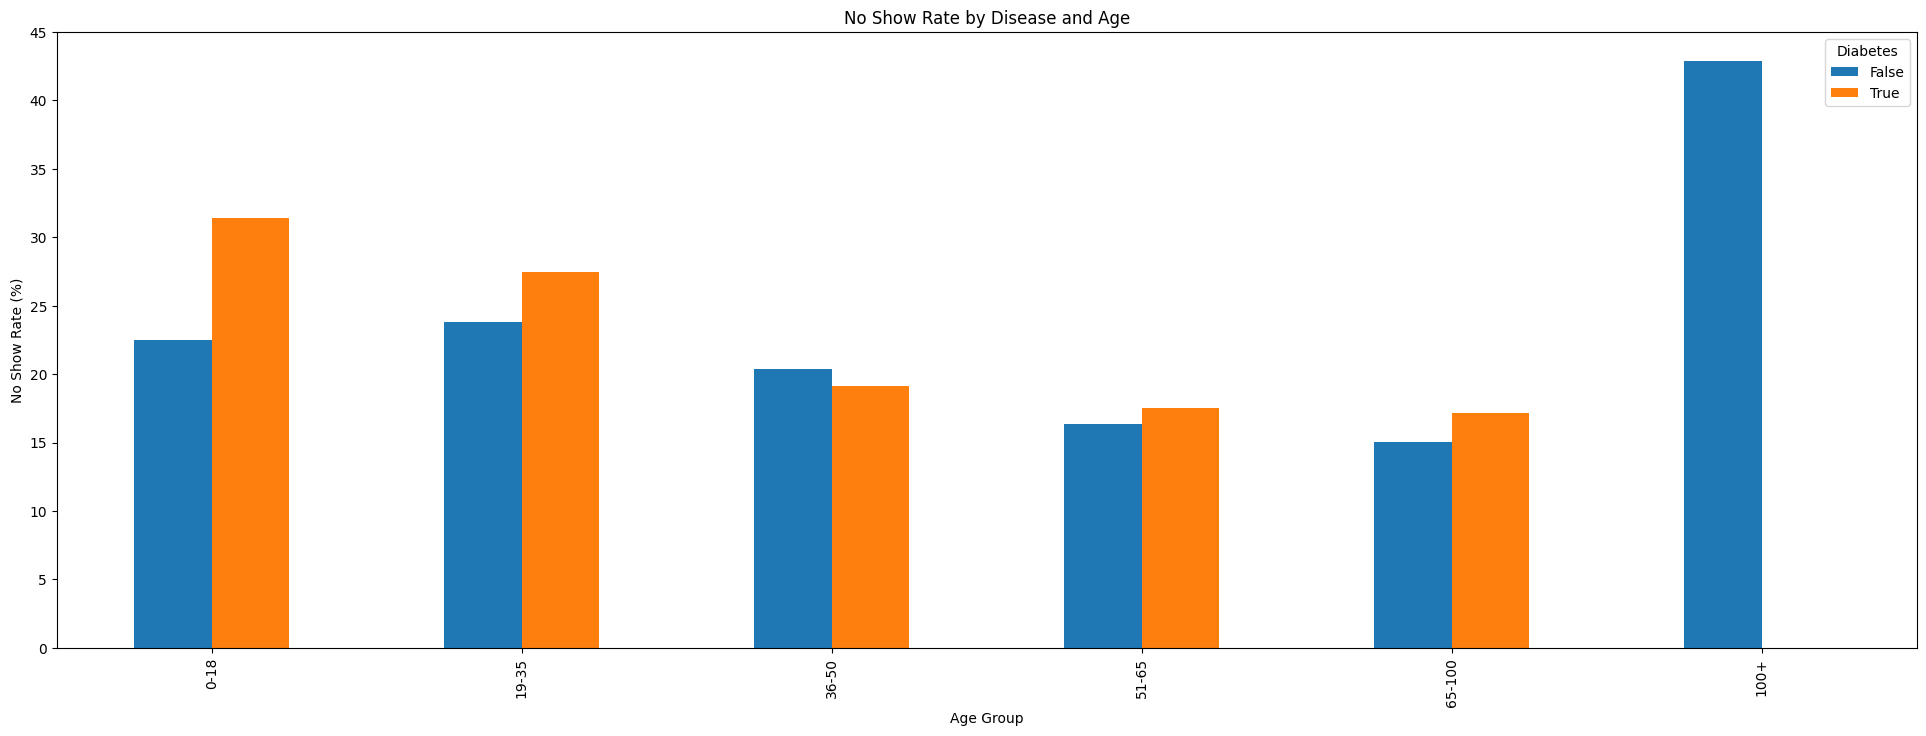

NoShow                No   Yes  Total  NoShowRate
AgeGroup Diabetes                                
0-18     False     19584  5691  25275   22.516320
         True         35    16     51   31.372549
19-35    False     18220  5689  23909   23.794387
         True        164    62    226   27.433628
36-50    False     16601  4253  20854   20.394169

In [419]:
hypothesis_5=df[['Age','Diabetes','NoShow']]
hypothesis_5['AgeGroup'] = pd.cut(hypothesis_5['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
grouped_5=hypothesis_5.groupby(['AgeGroup','Diabetes','NoShow']).size().unstack(fill_value=0)
grouped_5['Total']=grouped_5.sum(axis=1)
grouped_5['NoShowRate']=grouped_5['Yes']/grouped_5['Total'] *100
grouped_5['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Disease and Age')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
grouped_5.head()

Hypothesis 6: Certain neighbourhood receive no sms and hence no show

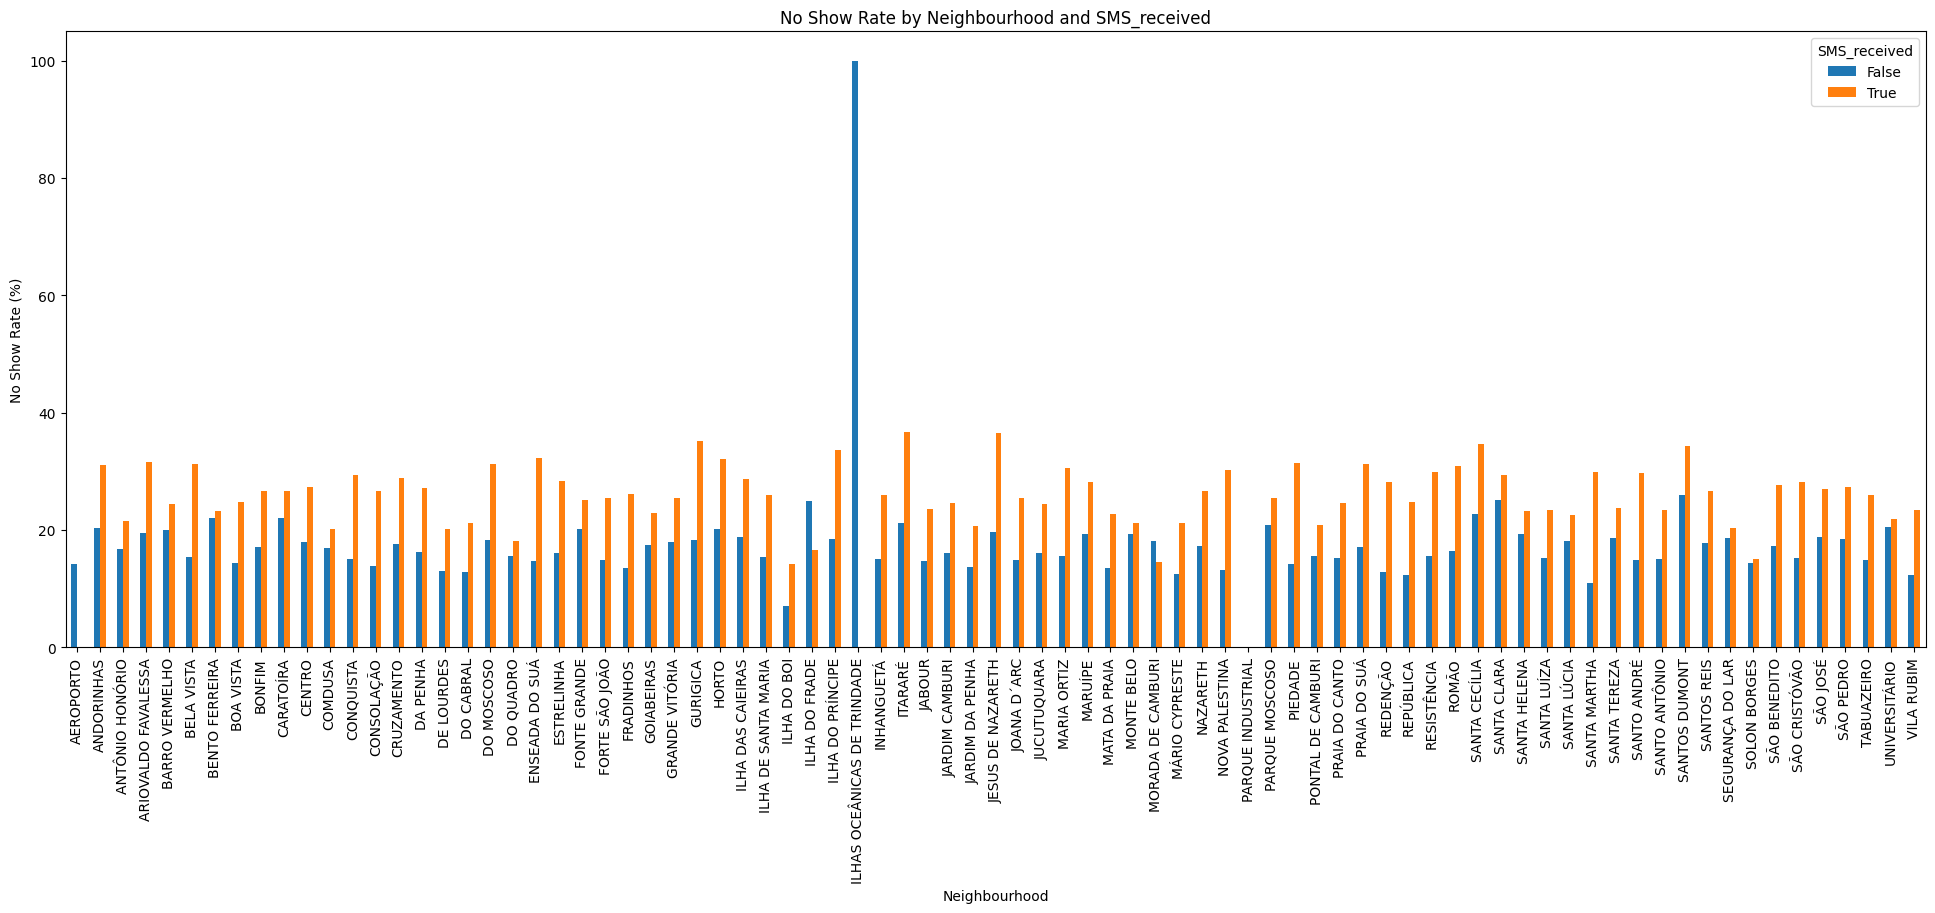

NoShow                          No  Yes  Total  NoShowRate
Neighbourhood   SMS_received                              
AEROPORTO       False            6    1      7   14.285714
                True             1    0      1    0.000000
ANDORINHAS      False         1350  345   1695   20.353982
                True           391  176    567   31.040564
ANTÔNIO HONÓRIO False          148   30    178   16.853933

In [420]:
hypothesis_6=df[['Neighbourhood','SMS_received','NoShow']]
grouped_6 = hypothesis_6.groupby([ 'Neighbourhood','SMS_received', 'NoShow']).size().unstack(fill_value=0)
grouped_6['Total'] = grouped_6.sum(axis=1)
grouped_6['NoShowRate'] = grouped_6['Yes'] / grouped_6['Total'] * 100  # assuming 'Yes' is for no-shows
grouped_6['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Neighbourhood and SMS_received')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()
grouped_6.head()

Hypothesis 7: People of a certain age are more proned to no shows for specific scheduled time


C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\238521457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_7['AgeGroup'] = pd.cut(hypothesis_7['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\238521457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_7['DaysBetweenTowDates'] = pd.cut(hypothesis_7['DaysBetweenTowDates'], bins=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120

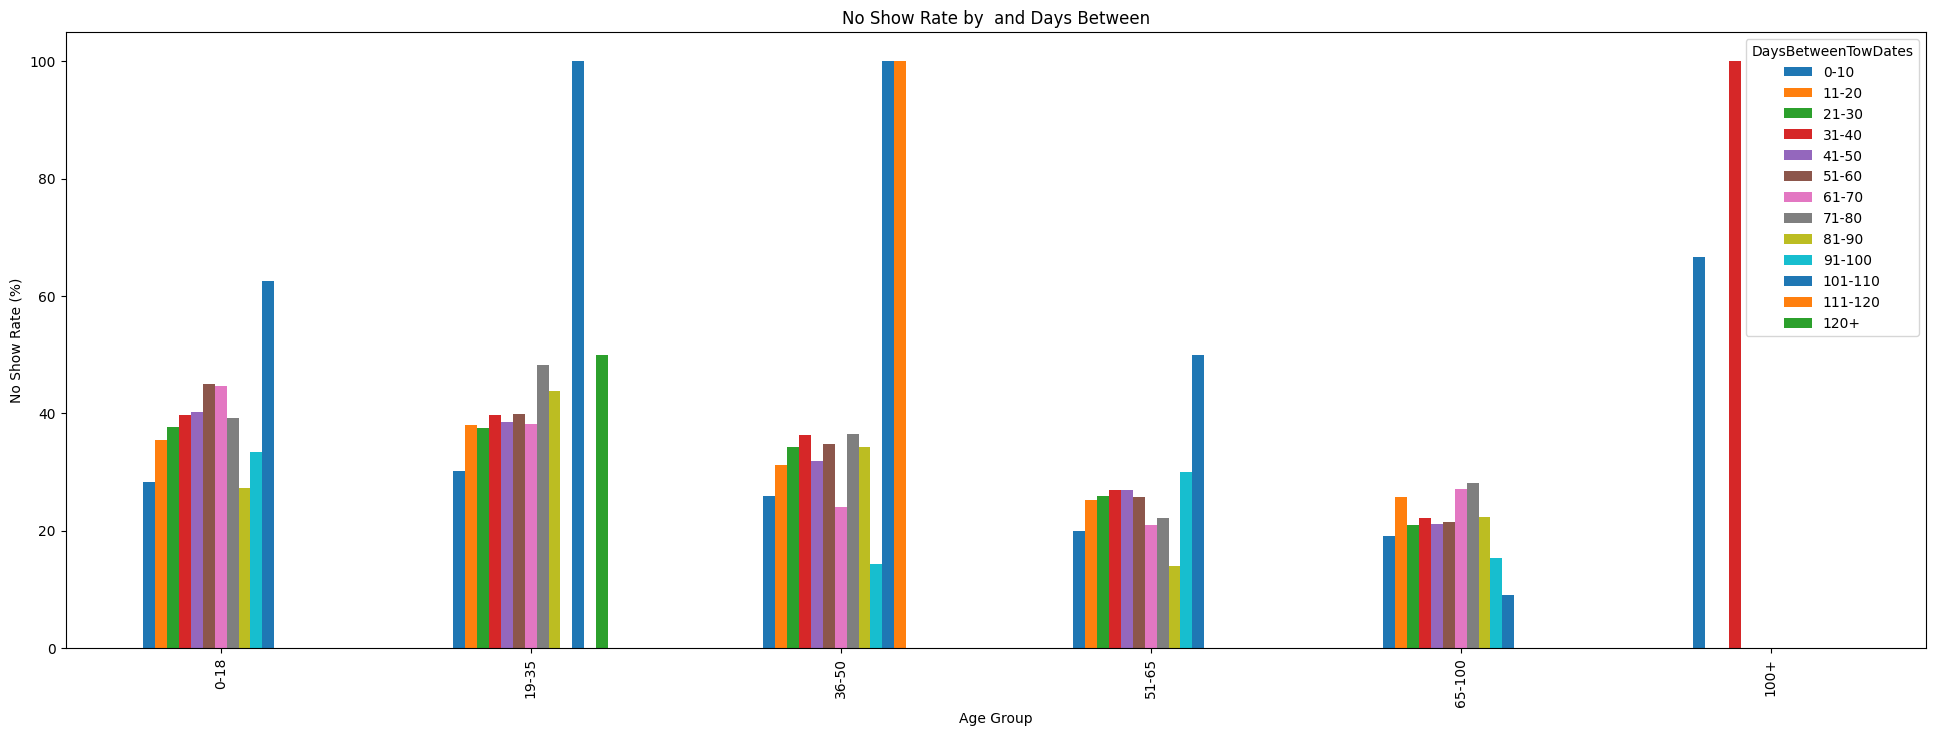

NoShow                          No   Yes  Total  NoShowRate
AgeGroup DaysBetweenTowDates                               
0-18     0-10                 5038  1990   7028   28.315310
         11-20                2103  1150   3253   35.351983
         21-30                1472   891   2363   37.706306
         31-40                 827   545   1372   39.723032
         41-50                 283   190    473   40.169133

In [421]:
hypothesis_7=df[['Age','DaysBetweenTowDates','NoShow']]
hypothesis_7['AgeGroup'] = pd.cut(hypothesis_7['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
hypothesis_7['DaysBetweenTowDates'] = pd.cut(hypothesis_7['DaysBetweenTowDates'], bins=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120,130], labels=['0-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120','120+'])
groupe_7=hypothesis_7.groupby(['AgeGroup','DaysBetweenTowDates','NoShow']).size().unstack(fill_value=0)
groupe_7['Total'] = groupe_7.sum(axis=1)
groupe_7['NoShowRate'] = groupe_7['Yes'] / groupe_7['Total'] * 100  # assuming 'Yes' is for no-shows
groupe_7['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by  and Days Between')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
groupe_7.head()

Hypothesis 8: People of a certain Age on a certain day are more likely to not show up

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_12132\144920064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_8['AgeGroup'] = pd.cut(hypothesis_8['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])


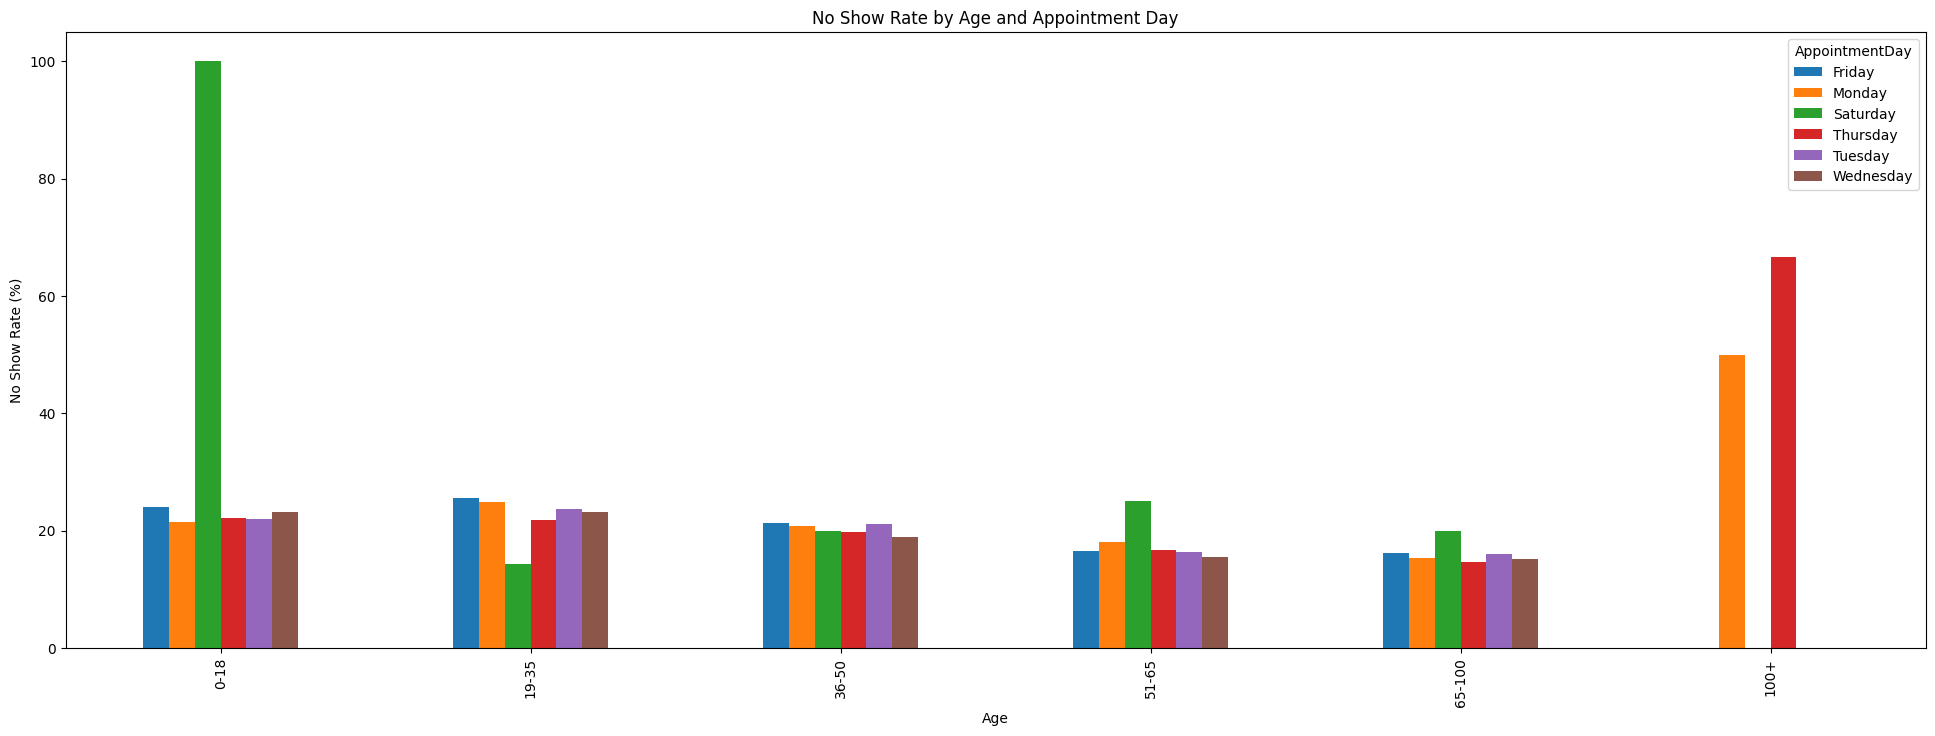

NoShow                     No   Yes  Total  NoShowRate
AgeGroup AppointmentDay                               
0-18     Friday          3381  1071   4452   24.056604
         Monday          4111  1122   5233   21.440856
         Saturday           0     1      1  100.000000
         Thursday        3013   856   3869   22.124580
         Tuesday         4494  1263   5757   21.938510

In [422]:
hypothesis_8=df[['Age','AppointmentDay','NoShow']]
hypothesis_8['AgeGroup'] = pd.cut(hypothesis_8['Age'], bins=[0, 18, 35, 50, 65, 100,115], labels=['0-18', '19-35', '36-50', '51-65', '65-100','100+'])
grouped_8 = hypothesis_8.groupby([ 'AgeGroup','AppointmentDay', 'NoShow']).size().unstack(fill_value=0)
grouped_8['Total'] = grouped_8.sum(axis=1)
grouped_8['NoShowRate'] = grouped_8['Yes'] / grouped_8['Total'] * 100  # assuming 'Yes' is for no-shows
grouped_8['NoShowRate'].unstack().plot(kind='bar', figsize=(24, 8))
plt.title('No Show Rate by Age and Appointment Day')
plt.ylabel('No Show Rate (%)')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.show()
grouped_8.head()

In [423]:
le=LabelEncoder()
scaler=StandardScaler()
df_encoded=df
df_encoded['Neighbourhood']=le.fit_transform(df_encoded['Neighbourhood'])
df_encoded['Age']=scaler.fit_transform(df_encoded[['Age']])

df_encoded['AppointmentDay']=le.fit_transform(df_encoded['AppointmentDay'])
df_encoded['NoShow']=le.fit_transform(df_encoded['NoShow'])
df_encoded['Gender']=le.fit_transform(df_encoded['Gender'])
df_encoded['Scholarship']=le.fit_transform(df_encoded['Scholarship'])
df_encoded['Hipertension']=le.fit_transform(df_encoded['Hipertension'])
df_encoded['Diabetes']=le.fit_transform(df_encoded['Alcoholism'])
df_encoded['SMS_received']=le.fit_transform(df_encoded['SMS_received'])
df_encoded['Alcoholism']=le.fit_transform(df_encoded['Alcoholism'])
df_encoded['DaysBetweenTowDates']=scaler.fit_transform(df_encoded[['DaysBetweenTowDates']])
df_encoded=df_encoded.drop("ScheduledDay", axis='columns')
#df_encoded=df_encoded.iloc[:,:-1]
df_encoded.head(20)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DaysBetweenTowDates
0,0,0,1.077925,39,0,1,0,0,0,0,0,-0.667603
1,1,0,0.818295,39,0,0,0,0,0,0,0,-0.667603
2,0,0,1.077925,45,0,0,0,0,0,0,0,-0.667603
3,0,0,-1.258748,54,0,0,0,0,0,0,0,-0.667603
4,0,0,0.818295,39,0,1,0,0,0,0,0,-0.667603
5,0,0,1.683729,58,0,1,0,0,0,0,0,-0.536499
6,0,0,-0.609672,25,0,0,0,0,0,0,1,-0.536499
7,0,0,0.082676,25,0,0,0,0,0,0,1,-0.536499
8,0,0,-0.696215,1,0,0,0,0,0,0,0,-0.667603
9,0,0,-0.782759,12,0,0,0,0,0,0,0,-0.536499


<h1>Correlation Through Heat Maps </h1>


In [424]:
correlation_mat=df_encoded.corr()
print(correlation_mat)

                       Gender  AppointmentDay       Age  Neighbourhood  \
Gender               1.000000       -0.007438 -0.106439      -0.008075   
AppointmentDay      -0.007438        1.000000  0.003278       0.006355   
Age                 -0.106439        0.003278  1.000000      -0.016349   
Neighbourhood       -0.008075        0.006355 -0.016349       1.000000   
Scholarship         -0.114297        0.000288 -0.092469       0.006879   
Hipertension        -0.055721        0.001454  0.504599       0.004343   
Diabetes             0.106170       -0.004271  0.095811      -0.000003   
Alcoholism           0.106170       -0.004271  0.095811      -0.000003   
Handcap              0.022787       -0.001825  0.078101       0.010888   
SMS_received        -0.046301        0.096220  0.012629       0.018297   
NoShow              -0.004132       -0.013106 -0.060320      -0.009023   
DaysBetweenTowDates -0.028411       -0.018958  0.034813      -0.002025   

                     Scholarship  Hip

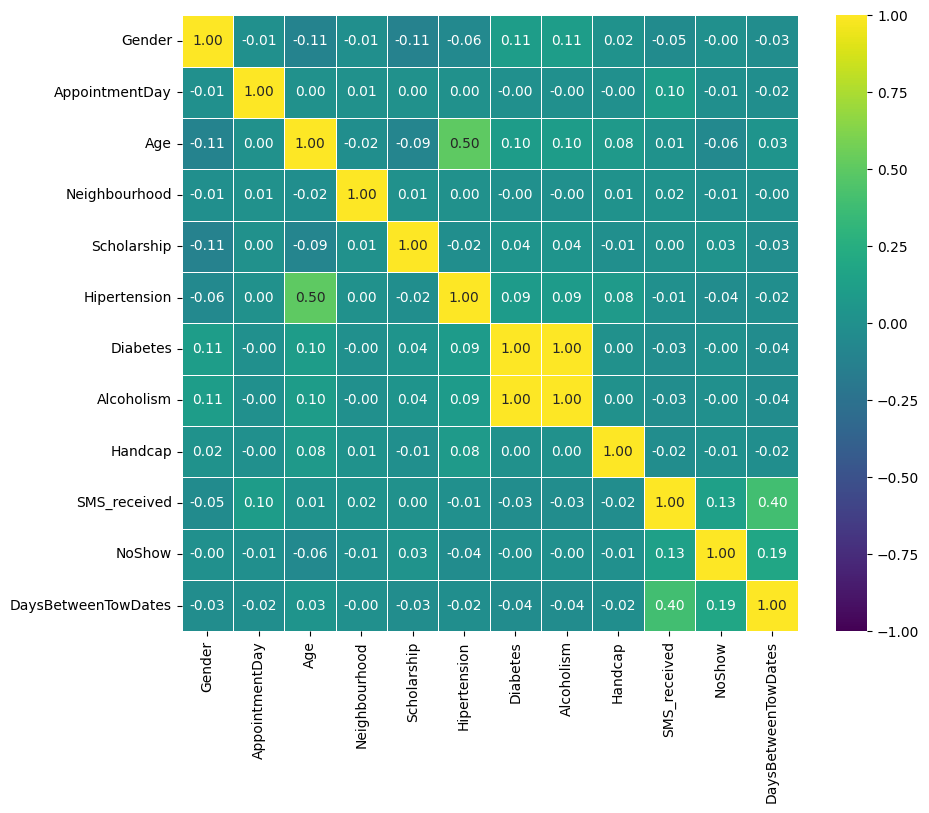

In [425]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_mat, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

<h1> Modelling and Evaluation </h1>

Class distribution after SMOTE: 
NoShow
0    49824
1    42351
Name: count, dtype: int64
Gender                 0
AppointmentDay         0
Age                    0
Neighbourhood          0
Scholarship            0
Hipertension           0
Diabetes               0
Alcoholism             0
Handcap                0
SMS_received           0
DaysBetweenTowDates    0
dtype: int64
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6366945065101374
Test Accuracy: 0.6697127346754128
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     17621
           1       0.32      0.55      0.40      4484

    accuracy                           0.67     22105
   macro avg       0.59      0.63      0.59     22105
weighted avg       0.75      0.67      0.70     22105

AUC Score: 0.6569007493542419


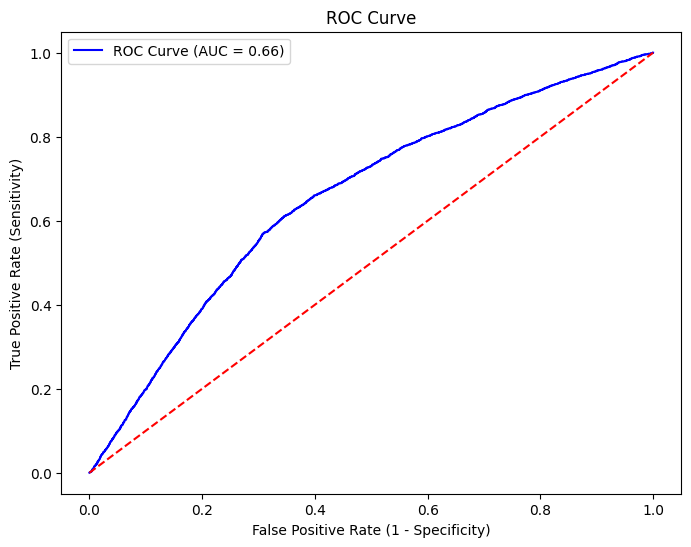

In [426]:
# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['NoShow'])  # Drop target column from features
y = df_encoded['NoShow']  # Target variable
# Split the data into train and test sets (80% training, 20% testing)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.85)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_resampled, y_train_resampled=pipeline.fit_resample(X_train,y_train)
#adasyn = ADASYN()
#X_train_resampled, y_train_resampled=adasyn.fit_resample(X_train,y_train)

print(f"Class distribution after SMOTE with undersampling of majority class as well: \n{y_train_resampled.value_counts()}")
# Create the logistic regression model
log_reg = LogisticRegression(class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'solver': ['liblinear']    # Solver (liblinear supports l1/l2 penalties)
}

missing_indices = X_train_resampled.index[X_train_resampled.isna().any(axis=1)]

X_train_resampled=X_train_resampled.drop(missing_indices)
y_train_resampled = y_train_resampled.drop(missing_indices)
print(X_train_resampled.isna().sum())
#Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# Fit the model to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Make predictions using the best model found by GridSearchCV
best_log_reg = grid_search.best_estimator_

# Predict probabilities for the test data (to get the probability of no-show)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for class '1'

# Predict class labels
y_pred = best_log_reg.predict(X_test)

# Accuracy of the model
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random performance)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [427]:
from matplotlib import pyplot
from numpy import where


over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.85)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
new_X,newY=pipeline.fit_resample(X_train,y_train)
counter=(newY)
print(Counter(y_train))
print(Counter(newY))

Counter({0: 70586, 1: 17830})
Counter({0: 49824, 1: 42351})


<h2>ADASYN</h2>

In [428]:
from matplotlib import pyplot
from numpy import where


oversample = ADASYN()
new_X,newY=oversample.fit_resample(X_train,y_train)
counter=(newY)
print(Counter(y_train))
print(Counter(newY))

Counter({0: 70586, 1: 17830})
Counter({0: 70586, 1: 70206})


<h3>Random Forest </h3>

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'class_weight': None, 'max_depth': None, 'n_estimators': 200}
Best cross-validation accuracy: 0.818606413349458
Test Accuracy: 0.7288848676769961
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     17621
           1       0.35      0.39      0.37      4484

    accuracy                           0.73     22105
   macro avg       0.59      0.60      0.60     22105
weighted avg       0.74      0.73      0.73     22105

ROC-AUC Score: 0.7098340651241237


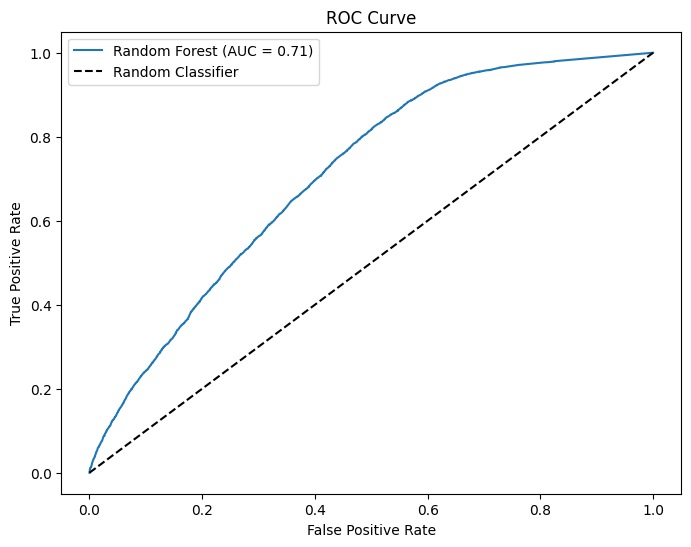

In [434]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
adasyn = ADASYN()
new_X,newY=adasyn.fit_resample(X_train,y_train)
missing_indices_1 = new_X.index[new_X.isna().any(axis=1)]
new_X=new_X.drop(missing_indices_1)
newY = newY.drop(missing_indices_1)
grid_search.fit(new_X, newY)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")
best_rf = grid_search.best_estimator_

# Predict class labels for the test set
y_pred = best_rf.predict(X_test)

# Predict probabilities for the test set (to get probability of the positive class '1')
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h1>XGBoost Classifier </h1>


In [444]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 6, 10],     # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (shrinkage)
    'scale_pos_weight': [1, 2, 5],      # Balancing the positive class
    'gpu_id': [0],              # GPU ID, for multi-GPU setups
    'tree_method': ['gpu_hist'] # Use GPU for training
}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Apply ADASYN for resampling to balance the classes
adasyn = ADASYN()
new_X, newY = adasyn.fit_resample(X_train, y_train)

# Handle missing values by dropping rows with NaN in new_X and newY
missing_indices_1 = new_X.index[new_X.isna().any(axis=1)]
new_X = new_X.drop(missing_indices_1)
newY = newY.drop(missing_indices_1)
new_X['Handcap']=new_X['Handcap'].astype('int64')

# Fit the grid search model
grid_search.fit(new_X, newY)

# Get the best parameters and cross-validation score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Use the best model
best_xgb = grid_search.best_estimator_

# Predict class labels for the test set
y_pred = best_xgb.predict(X_test)

# Predict probabilities for the test set (to get probability of the positive class '1')
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

array([0, 1, 3, 2, 4], dtype=int64)